## L16B Machine Learning for Econometrics using Logistic Regression: Constitutional Voting
This project demonstrates: 
* an understanding of how to describe a dataset and detail how it was collected, cleaned, and wrangled.
* successful application of exploratory data analysis (visualization and inferential statistics), for example histograms, scatter plots and hypothesis testing appropriately.
* successful application of data storytelling techniques to articulate hypotheses and inferences, appropriate to their  target audience.

Also, this project performs two different logistic regression implementations on two
different datasets of the format (float, int), one
implementation is in this file and one from the sklearn library. The project
then compares the two analyses to provide more reliable and robust results.

# Step 1: Importing Moduls and Data

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import seaborn as sns
import statsmodels.api as sm
import pylab as pl
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('judge_vote.csv')

In [3]:
df

,Number,Case_no,Sub_case_no,Case_year,Vote,Leg_right,Petit_president,Petit_right,Oppos_assembly,Gov_structure,...,int6,int7,Unnamed: 120,HS_AT_AG,HS_AT_ANS,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
0,1,1,1,2014,0,1,0,0,40.55,1,...,0,0,NaN,9,3,0,0,0,0,2
1,2,1,1,2014,0,1,0,0,40.55,1,...,0,0,NaN,9,3,0,0,0,0,2
2,3,1,1,2014,0,1,0,0,40.55,1,...,0,0,NaN,9,3,0,0,0,0,2
3,4,1,1,2014,1,1,0,0,40.55,1,...,0,0,NaN,9,3,0,0,0,0,2
4,5,1,1,2014,0,1,0,0,40.55,1,...,0,0,NaN,9,3,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31552,31553,419,419(5),1984,0,1,0,0,47.12,1,...,0,0,NaN,0,0,0,0,0,1,14
31553,31554,419,419(5),1984,1,1,0,0,47.12,1,...,0,0,NaN,0,0,0,0,0,1,14
31554,31555,419,419(5),1984,0,1,0,0,47.12,1,...,1,0,NaN,0,0,0,0,0,1,14
31555,31556,419,419(5),1984,0,1,0,0,47.12,1,...,0,0,NaN,0,0,0,0,0,1,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31557 entries, 0 to 31556
Columns: 128 entries, Number to HS_AT_OTHERS
dtypes: float64(1), int64(1), object(126)
memory usage: 30.8+ MB


In [5]:
df.describe()

,Leg_right,Unnamed: 120
count,31557.000000,0.0
mean,0.919447,NaN
std,0.272151,NaN
min,0.000000,NaN
25%,1.000000,NaN
50%,1.000000,NaN
75%,1.000000,NaN
max,1.000000,NaN


In [6]:
df.std()

Leg_right       0.272151
Unnamed: 120         NaN
dtype: float64

In [7]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 126 categorical variables

The categorical variables are : ['Number', 'Case_no', 'Sub_case_no', 'Case_year', 'Vote', 'Petit_president', 'Petit_right', 'Oppos_assembly', 'Gov_structure', 'Gov_right', 'President_right', 'Norm_type', 'Against_vote', 'Judge_no_right', 'CB_AT_IDEO', 'Judge_age', 'Judge_gender', 'Judge_career', 'Judge_AU', 'Infl', 'Unemp', 'Income_PC', 'H71', 'H70', 'H69', 'H68', 'H67', 'H66', 'H65', 'H64', 'H63', 'H62', 'H61', 'H60', 'H59', 'H58', 'H57', 'H56', 'H55', 'H54', 'H53', 'H52', 'H51', 'H50', 'H49', 'H48', 'H47', 'H46', 'H45', 'H44', 'H43', 'H42', 'H41', 'H40', 'H39', 'H38', 'H37', 'H36', 'H35', 'H34', 'H33', 'H32', 'H31', 'H30', 'H29', 'H28', 'H27', 'H26', 'H25', 'H24', 'H23', 'H22', 'H21', 'H20', 'H19', 'H18', 'H17', 'H16', 'H15', 'H14', 'H13', 'H12', 'H11', 'H10', 'H9', 'H8', 'H7', 'H6', 'H5', 'H4', 'H3', 'H2', 'H1', 'AG', 'ANS', 'SD', 'TO', 'KE', 'FK', 'Others', 'y1987', 'y1993', 'y1995', 'y1999', 'y2001', 'y2002', 'y2004', 'y2005', 'y2006', 'y2007',

In [8]:
df[categorical].head()

,Number,Case_no,Sub_case_no,Case_year,Vote,Petit_president,Petit_right,Oppos_assembly,Gov_structure,Gov_right,...,int5,int6,int7,HS_AT_AG,HS_AT_ANS,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
0,1,1,1,2014,0,0,0,40.55,1,1,...,0,0,0,9,3,0,0,0,0,2
1,2,1,1,2014,0,0,0,40.55,1,1,...,0,0,0,9,3,0,0,0,0,2
2,3,1,1,2014,0,0,0,40.55,1,1,...,0,0,0,9,3,0,0,0,0,2
3,4,1,1,2014,1,0,0,40.55,1,1,...,0,0,0,9,3,0,0,0,0,2
4,5,1,1,2014,0,0,0,40.55,1,1,...,0,0,0,9,3,0,0,0,0,2


In [9]:
df['Case_year'].dtypes

dtype('O')

In [10]:
for var in categorical:
    df[var] = pd.to_numeric(df[var], errors='coerce')

In [11]:
df

,Number,Case_no,Sub_case_no,Case_year,Vote,Leg_right,Petit_president,Petit_right,Oppos_assembly,Gov_structure,...,int6,int7,Unnamed: 120,HS_AT_AG,HS_AT_ANS,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
0,1.0,1.0,1.0,2014.0,0.0,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
1,2.0,1.0,1.0,2014.0,0.0,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
2,3.0,1.0,1.0,2014.0,0.0,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
3,4.0,1.0,1.0,2014.0,1.0,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
4,5.0,1.0,1.0,2014.0,0.0,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31552,31553.0,419.0,NaN,1984.0,0.0,1,0.0,0.0,47.12,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31553,31554.0,419.0,NaN,1984.0,1.0,1,0.0,0.0,47.12,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31554,31555.0,419.0,NaN,1984.0,0.0,1,0.0,0.0,47.12,1.0,...,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31555,31556.0,419.0,NaN,1984.0,0.0,1,0.0,0.0,47.12,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,14.0


In [12]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 128 numerical variables

The numerical variables are : ['Number', 'Case_no', 'Sub_case_no', 'Case_year', 'Vote', 'Leg_right', 'Petit_president', 'Petit_right', 'Oppos_assembly', 'Gov_structure', 'Gov_right', 'President_right', 'Norm_type', 'Against_vote', 'Judge_no_right', 'CB_AT_IDEO', 'Judge_age', 'Judge_gender', 'Judge_career', 'Judge_AU', 'Infl', 'Unemp', 'Income_PC', 'H71', 'H70', 'H69', 'H68', 'H67', 'H66', 'H65', 'H64', 'H63', 'H62', 'H61', 'H60', 'H59', 'H58', 'H57', 'H56', 'H55', 'H54', 'H53', 'H52', 'H51', 'H50', 'H49', 'H48', 'H47', 'H46', 'H45', 'H44', 'H43', 'H42', 'H41', 'H40', 'H39', 'H38', 'H37', 'H36', 'H35', 'H34', 'H33', 'H32', 'H31', 'H30', 'H29', 'H28', 'H27', 'H26', 'H25', 'H24', 'H23', 'H22', 'H21', 'H20', 'H19', 'H18', 'H17', 'H16', 'H15', 'H14', 'H13', 'H12', 'H11', 'H10', 'H9', 'H8', 'H7', 'H6', 'H5', 'H4', 'H3', 'H2', 'H1', 'AG', 'ANS', 'SD', 'TO', 'KE', 'FK', 'Others', 'y1987', 'y1993', 'y1995', 'y1999', 'y2001', 'y2002', 'y2004', 'y2005', 'y2006',

In [13]:
# view the numerical variables

df[numerical].head()

,Number,Case_no,Sub_case_no,Case_year,Vote,Leg_right,Petit_president,Petit_right,Oppos_assembly,Gov_structure,...,int6,int7,Unnamed: 120,HS_AT_AG,HS_AT_ANS,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
0,1.0,1.0,1.0,2014.0,0.0,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
1,2.0,1.0,1.0,2014.0,0.0,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
2,3.0,1.0,1.0,2014.0,0.0,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
3,4.0,1.0,1.0,2014.0,1.0,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
4,5.0,1.0,1.0,2014.0,0.0,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0


# Step 2: Exploratory data analysis

In [14]:
# Q1: Are there variables that are particularly significant in terms of explaining the answer to your project question?

In [15]:
df.columns

Index(['Number', 'Case_no', 'Sub_case_no', 'Case_year', 'Vote', 'Leg_right',
       'Petit_president', 'Petit_right', 'Oppos_assembly', 'Gov_structure',
       ...
       'int6', 'int7', 'Unnamed: 120', 'HS_AT_AG', 'HS_AT_ANS', 'HS_AT_SD',
       'HS_AT_TO', 'HS_AT_KE', 'HS_AT_FK', 'HS_AT_OTHERS'],
      dtype='object', length=128)

In [16]:
df['Vote'].value_counts()

0.0    21915
1.0     9641
Name: Vote, dtype: int64

In [17]:
df.groupby(['Case_year','Vote']).count()

Number  Case_no  Sub_case_no  Leg_right  Petit_president  \
Case_year Vote                                                             
1984.0    0.0      169      169            0        169              169   
          1.0       26       26            0         26               26   
1985.0    0.0      197      197           31        197              197   
          1.0       78       78            2         78               78   
1986.0    0.0      346      346           11        346              346   
...                ...      ...          ...        ...              ...   
2012.0    1.0     1139     1139            0       1139             1139   
2013.0    0.0     4150     4150           99       4150             4150   
          1.0      888      888           12        888              888   
2014.0    0.0     1593     1593           28       1593             1593   
          1.0      629      629            2        629              629   

                Petit_right  Oppos_assembly  Gov_structure  Gov_right  \
Case_year Vote                                                          
1984.0    0.0           169             169            169        169   
          1.0            26              26             26         26   
1985.0    0.0           197             197            197        197   
          1.0            78              78             78         78   
1986.0    0.0           346             346            346        346   
...                     ...             ...            ...        ...   
2012.0    1.0          1139            1139           1139       1139   
2013.0    0.0          4150            4150           4150       4150   
          1.0           888             888            888        888   
2014.0    0.0          1593            1593           1593       1593   
          1.0           629             629            629        629   

                President_right  ...  int6  int7  Unnamed: 120  HS_AT_AG  \
Case_year Vote                   ...                                       
1984.0    0.0               169  ...   169   169             0       169   
          1.0                26  ...    26    26             0        26   
1985.0    0.0               197  ...   197   197             0       197   
          1.0                78  ...    78    78             0        78   
1986.0    0.0               346  ...   346   346             0       346   
...                         ...  ...   ...   ...           ...       ...   
2012.0    1.0              1139  ...  1139  1139             0      1139   
2013.0    0.0              4150  ...  4150  4150             0      4150   
          1.0               888  ...   888   888             0       888   
2014.0    0.0              1593  ...  1593  1593             0      1593   
          1.0               629  ...   629   629             0       629   

                HS_AT_ANS  HS_AT_SD  HS_AT_TO  HS_AT_KE  HS_AT_FK  \
Case_year Vote                                                      
1984.0    0.0         169       169       169       169       169   
          1.0          26        26        26        26        26   
1985.0    0.0         197       197       197       197       197   
          1.0          78        78        78        78        78   
1986.0    0.0         346       346       346       346       346   
...                   ...       ...       ...       ...       ...   
2012.0    1.0        1139      1139      1139      1139      1139   
2013.0    0.0        4150      4150      4150      4150      4150   
          1.0         888       888       888       888       888   
2014.0    0.0        1593      1593      1593      1593      1593   
          1.0         629       629       629       629       629   

                HS_AT_OTHERS  
Case_year Vote                
1984.0    0.0            169  
          1.0             26  
1985.0    0.0            197  
          1.0             78  
1986

In [18]:
df.groupby(['Case_year','Vote']).count()[['Leg_right']]

Leg_right
Case_year Vote           
1984.0    0.0         169
          1.0          26
1985.0    0.0         197
          1.0          78
1986.0    0.0         346
...                   ...
2012.0    1.0        1139
2013.0    0.0        4150
          1.0         888
2014.0    0.0        1593
          1.0         629

[62 rows x 1 columns]

In [19]:
df['Vote'].value_counts()

0.0    21915
1.0     9641
Name: Vote, dtype: int64

In [20]:
# Because I have categorical variables containing a mix of integers and strings, we can convert only the integer values to integers and leave the strings as they are and handle them later, when needed. This can be achieved using the following code:
for var in categorical:
    df[var] = pd.to_numeric(df[var], errors='coerce').fillna(df[var])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31557 entries, 0 to 31556
Columns: 128 entries, Number to HS_AT_OTHERS
dtypes: float64(127), int64(1)
memory usage: 30.8 MB


In [22]:
# Rename the 'Vote' column values
df['Vote'] = df['Vote'].map({0: 'Constitutional', 1: 'Unconstitutional'})

# Group the DataFrame by Case_year and count the frequency of each category in the Vote column
vote_counts = df.groupby(['Case_year', 'Vote']).size().unstack().fillna(0)
vote_counts

Vote,Constitutional,Unconstitutional
Case_year,,
1984.0,169,26
1985.0,197,78
1986.0,346,237
1987.0,319,176
1988.0,543,392
1989.0,123,119
1990.0,159,171
1991.0,687,457
1992.0,664,601


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31557 entries, 0 to 31556
Columns: 128 entries, Number to HS_AT_OTHERS
dtypes: float64(126), int64(1), object(1)
memory usage: 30.8+ MB


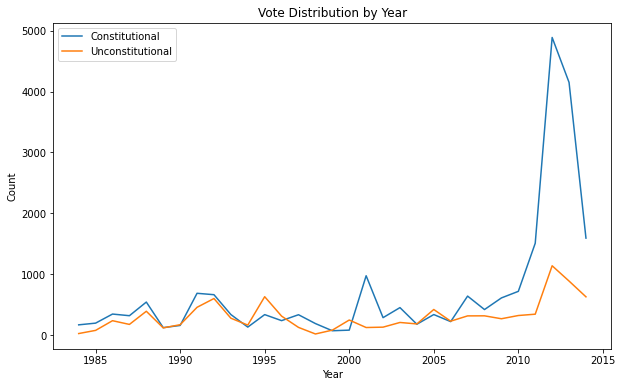

In [24]:
# Plot the line chart
vote_counts.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Vote Distribution by Year')
plt.legend(['Constitutional', 'Unconstitutional'])
plt.show()

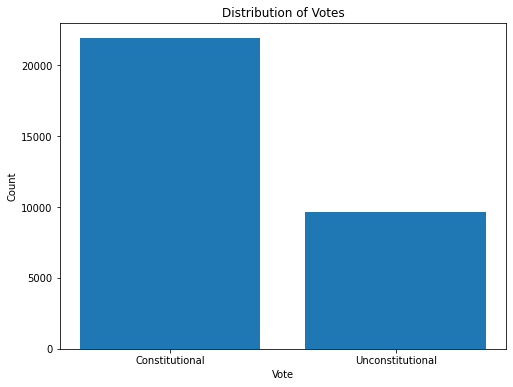

In [25]:
# Count the frequency of each category in the "Vote" column
vote_counts = df['Vote'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(vote_counts.index, vote_counts.values)
plt.xlabel('Vote')
plt.ylabel('Count')
plt.title('Distribution of Votes')
plt.show()

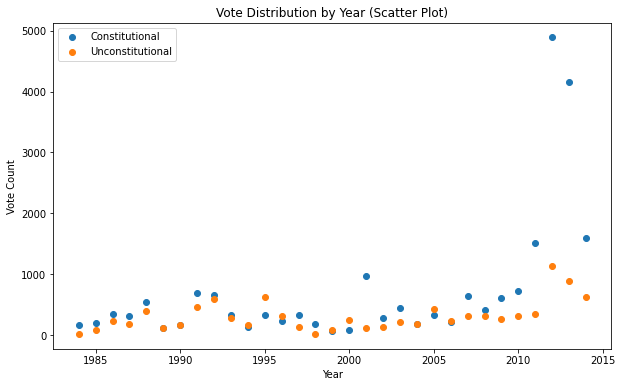

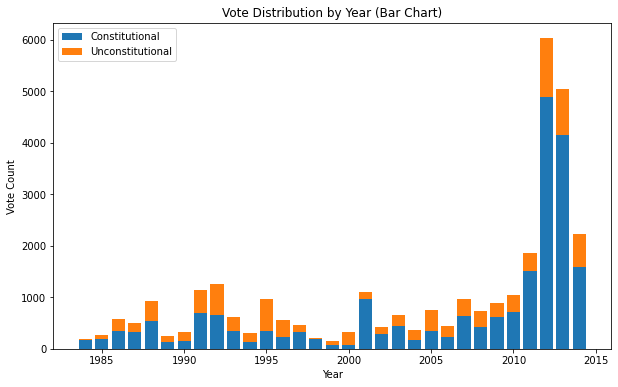

In [26]:
# Group the DataFrame by Case_year and count the frequency of each category in the Vote column
vote_counts = df.groupby('Case_year')['Vote'].value_counts().unstack().fillna(0)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(vote_counts.index, vote_counts['Constitutional'], label='Constitutional')
plt.scatter(vote_counts.index, vote_counts['Unconstitutional'], label='Unconstitutional')
plt.xlabel('Year')
plt.ylabel('Vote Count')
plt.title('Vote Distribution by Year (Scatter Plot)')
plt.legend()
plt.show()

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(vote_counts.index, vote_counts['Constitutional'], label='Constitutional')
plt.bar(vote_counts.index, vote_counts['Unconstitutional'], bottom=vote_counts['Constitutional'], label='Unconstitutional')
plt.xlabel('Year')
plt.ylabel('Vote Count')
plt.title('Vote Distribution by Year (Bar Chart)')
plt.legend()
plt.show()


In [27]:
df.groupby('Vote').mean()

,Number,Case_no,Sub_case_no,Case_year,Leg_right,Petit_president,Petit_right,Oppos_assembly,Gov_structure,Gov_right,...,int6,int7,Unnamed: 120,HS_AT_AG,HS_AT_ANS,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
Vote,,,,,,,,,,,,,,,,,,,,,
Constitutional,14588.481725,148.052749,171.307612,2006.198038,0.916131,0.014282,0.126352,39.805544,0.838010,0.934337,...,0.004472,0.0,NaN,4.280949,3.886288,1.05389,1.785718,0.725987,0.038239,1.997445
Unconstitutional,18483.535837,207.838502,264.017084,2002.255057,0.927082,0.039519,0.169173,39.301376,0.719013,0.941604,...,0.002074,0.0,NaN,2.496629,3.097293,1.26937,2.281402,1.394980,0.053107,1.989005


In [28]:
# Calculate the counts of Unconstitutional and Constitutional votes
vote_counts = df['Vote'].value_counts()

# Calculate the rate of unconstitutionality
rate_of_unconstitutionality = (vote_counts['Unconstitutional'] / (vote_counts['Unconstitutional'] + vote_counts['Constitutional'])) * 100

# Print the rate of unconstitutionality
print("Rate of Unconstitutionality: {:.2f}%".format(rate_of_unconstitutionality))


Rate of Unconstitutionality: 30.55%


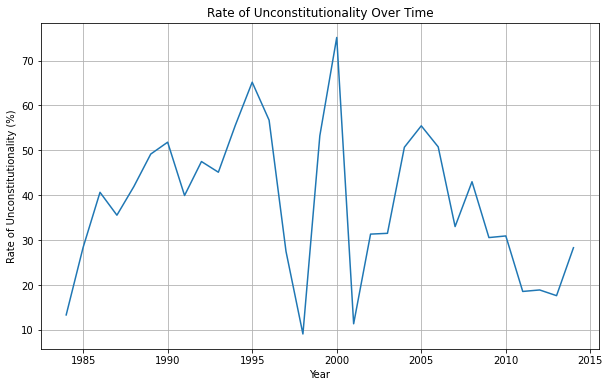

In [29]:
# Calculate the rate of unconstitutionality over time
rate_of_unconstitutionality = df.groupby('Case_year')['Vote'].apply(lambda x: (x == 'Unconstitutional').mean() * 100)

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(rate_of_unconstitutionality.index, rate_of_unconstitutionality.values)
plt.xlabel('Year')
plt.ylabel('Rate of Unconstitutionality (%)')
plt.title('Rate of Unconstitutionality Over Time')
plt.grid(True)
plt.show()


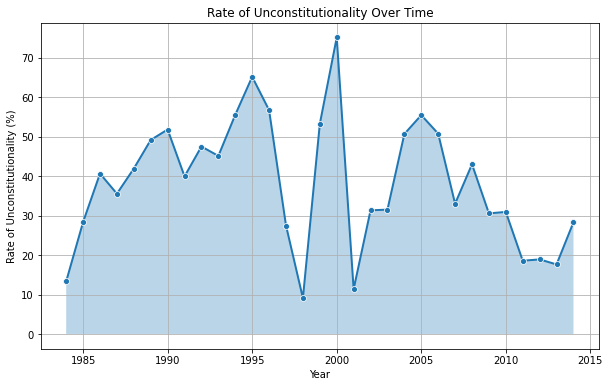

In [30]:
# Calculate the rate of unconstitutionality over time
rate_of_unconstitutionality = df.groupby('Case_year')['Vote'].apply(lambda x: (x == 'Unconstitutional').mean() * 100)

# Create an area chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=rate_of_unconstitutionality, marker='o', linewidth=2)
plt.fill_between(rate_of_unconstitutionality.index, rate_of_unconstitutionality.values, alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Rate of Unconstitutionality (%)')
plt.title('Rate of Unconstitutionality Over Time')
plt.grid(True)
plt.show()


# Outliers in numerical variables

In [31]:
df

,Number,Case_no,Sub_case_no,Case_year,Vote,Leg_right,Petit_president,Petit_right,Oppos_assembly,Gov_structure,...,int6,int7,Unnamed: 120,HS_AT_AG,HS_AT_ANS,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
0,1.0,1.0,1.0,2014.0,Constitutional,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
1,2.0,1.0,1.0,2014.0,Constitutional,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
2,3.0,1.0,1.0,2014.0,Constitutional,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
3,4.0,1.0,1.0,2014.0,Unconstitutional,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
4,5.0,1.0,1.0,2014.0,Constitutional,1,0.0,0.0,40.55,1.0,...,0.0,0.0,NaN,9.0,3.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31552,31553.0,419.0,NaN,1984.0,Constitutional,1,0.0,0.0,47.12,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31553,31554.0,419.0,NaN,1984.0,Unconstitutional,1,0.0,0.0,47.12,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31554,31555.0,419.0,NaN,1984.0,Constitutional,1,0.0,0.0,47.12,1.0,...,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31555,31556.0,419.0,NaN,1984.0,Constitutional,1,0.0,0.0,47.12,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,14.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31557 entries, 0 to 31556
Columns: 128 entries, Number to HS_AT_OTHERS
dtypes: float64(126), int64(1), object(1)
memory usage: 30.8+ MB


In [33]:
print(df['Vote'].dtype)

object


In [34]:
df['Vote'] = df['Vote'].map({'Constitutional': 0, 'Unconstitutional': 1})

In [35]:
missing_values = df.isnull().sum()
print(missing_values)

Number              1
Case_no             1
Sub_case_no     29720
Case_year           1
Vote                1
                ...  
HS_AT_SD            1
HS_AT_TO            1
HS_AT_KE            1
HS_AT_FK            1
HS_AT_OTHERS        1
Length: 128, dtype: int64


In [36]:
df.dropna(subset=['Vote'], inplace=True)

In [37]:
missing_values = df.isnull().sum()
missing_variables = missing_values[missing_values > 0]
print(missing_variables)

Sub_case_no     29719
Unnamed: 120    31556
dtype: int64


In [38]:
# I will drop int1, int2, int3, int4, int5, int6, and int7 because they are proxy variables for HS_AT_AG, HS_AT_ANS, HS_AT_SD, HS_AT_TO, HS_AT_KE, HS_AT_FK, and HS_AT_OTHERS
df.drop(['Sub_case_no', 'Number', 'Case_no', 'Unnamed: 120', 'int1', 'int2', 'int3', 'int4', 'int5', 'int6', 'int7'], axis=1, inplace=True)
df

,Case_year,Vote,Leg_right,Petit_president,Petit_right,Oppos_assembly,Gov_structure,Gov_right,President_right,Norm_type,...,y2007,y2008,y2010,HS_AT_AG,HS_AT_ANS,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
0,2014.0,0.0,1,0.0,0.0,40.55,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0
1,2014.0,0.0,1,0.0,0.0,40.55,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0
2,2014.0,0.0,1,0.0,0.0,40.55,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0
3,2014.0,1.0,1,0.0,0.0,40.55,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0
4,2014.0,0.0,1,0.0,0.0,40.55,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31551,1984.0,0.0,1,0.0,0.0,47.12,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31552,1984.0,0.0,1,0.0,0.0,47.12,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31553,1984.0,1.0,1,0.0,0.0,47.12,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31554,1984.0,0.0,1,0.0,0.0,47.12,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31556 entries, 0 to 31555
Columns: 117 entries, Case_year to HS_AT_OTHERS
dtypes: float64(116), int64(1)
memory usage: 28.4 MB


In [40]:
missing_values = df.isnull().sum()
missing_values

Case_year          0
Vote               0
Leg_right          0
Petit_president    0
Petit_right        0
                  ..
HS_AT_SD           0
HS_AT_TO           0
HS_AT_KE           0
HS_AT_FK           0
HS_AT_OTHERS       0
Length: 117, dtype: int64

In [41]:
df

,Case_year,Vote,Leg_right,Petit_president,Petit_right,Oppos_assembly,Gov_structure,Gov_right,President_right,Norm_type,...,y2007,y2008,y2010,HS_AT_AG,HS_AT_ANS,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
0,2014.0,0.0,1,0.0,0.0,40.55,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0
1,2014.0,0.0,1,0.0,0.0,40.55,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0
2,2014.0,0.0,1,0.0,0.0,40.55,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0
3,2014.0,1.0,1,0.0,0.0,40.55,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0
4,2014.0,0.0,1,0.0,0.0,40.55,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31551,1984.0,0.0,1,0.0,0.0,47.12,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31552,1984.0,0.0,1,0.0,0.0,47.12,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31553,1984.0,1.0,1,0.0,0.0,47.12,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31554,1984.0,0.0,1,0.0,0.0,47.12,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0


In [42]:
# I will define numeric variables as df1_num
df_num = df[['Oppos_assembly', 'Judge_no_right', 'Judge_age', 'Infl', 'Unemp', 'Income_PC', 'HS_AT_AG', 'HS_AT_ANS']]
df_num

,Oppos_assembly,Judge_no_right,Judge_age,Infl,Unemp,Income_PC,HS_AT_AG,HS_AT_ANS
0,40.55,9.0,51.0,8.17,10.2,10542.81,9.0,3.0
1,40.55,9.0,42.0,8.17,10.2,10542.81,9.0,3.0
2,40.55,9.0,48.0,8.17,10.2,10542.81,9.0,3.0
3,40.55,9.0,52.0,8.17,10.2,10542.81,9.0,3.0
4,40.55,9.0,55.0,8.17,10.2,10542.81,9.0,3.0
...,...,...,...,...,...,...,...,...
31551,47.12,0.0,57.0,49.68,7.4,1246.20,0.0,0.0
31552,47.12,0.0,59.0,49.68,7.4,1246.20,0.0,0.0
31553,47.12,0.0,59.0,49.68,7.4,1246.20,0.0,0.0
31554,47.12,0.0,51.0,49.68,7.4,1246.20,0.0,0.0


In [43]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31556 entries, 0 to 31555
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Oppos_assembly  31556 non-null  float64
 1   Judge_no_right  31556 non-null  float64
 2   Judge_age       31556 non-null  float64
 3   Infl            31556 non-null  float64
 4   Unemp           31556 non-null  float64
 5   Income_PC       31556 non-null  float64
 6   HS_AT_AG        31556 non-null  float64
 7   HS_AT_ANS       31556 non-null  float64
dtypes: float64(8)
memory usage: 2.2 MB


# Finding Outliers in Numerical Variables

In [44]:
# A general checking for outliers in numerical variables 
# Calculate z-scores for numeric columns
z_scores = (df_num - df_num.mean()) / df_num.std()
# Find outliers based on a threshold (e.g., z-score greater than 3 or less than -3)
outliers = df_num[(z_scores > 3) | (z_scores < -3)]
outliers

,Oppos_assembly,Judge_no_right,Judge_age,Infl,Unemp,Income_PC,HS_AT_AG,HS_AT_ANS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
31551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31556 entries, 0 to 31555
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Oppos_assembly  451 non-null    float64
 1   Judge_no_right  0 non-null      float64
 2   Judge_age       0 non-null      float64
 3   Infl            297 non-null    float64
 4   Unemp           880 non-null    float64
 5   Income_PC       0 non-null      float64
 6   HS_AT_AG        0 non-null      float64
 7   HS_AT_ANS       0 non-null      float64
dtypes: float64(8)
memory usage: 2.2 MB


In [46]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31556 entries, 0 to 31555
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Oppos_assembly  31556 non-null  float64
 1   Judge_no_right  31556 non-null  float64
 2   Judge_age       31556 non-null  float64
 3   Infl            31556 non-null  float64
 4   Unemp           31556 non-null  float64
 5   Income_PC       31556 non-null  float64
 6   HS_AT_AG        31556 non-null  float64
 7   HS_AT_ANS       31556 non-null  float64
dtypes: float64(8)
memory usage: 2.2 MB


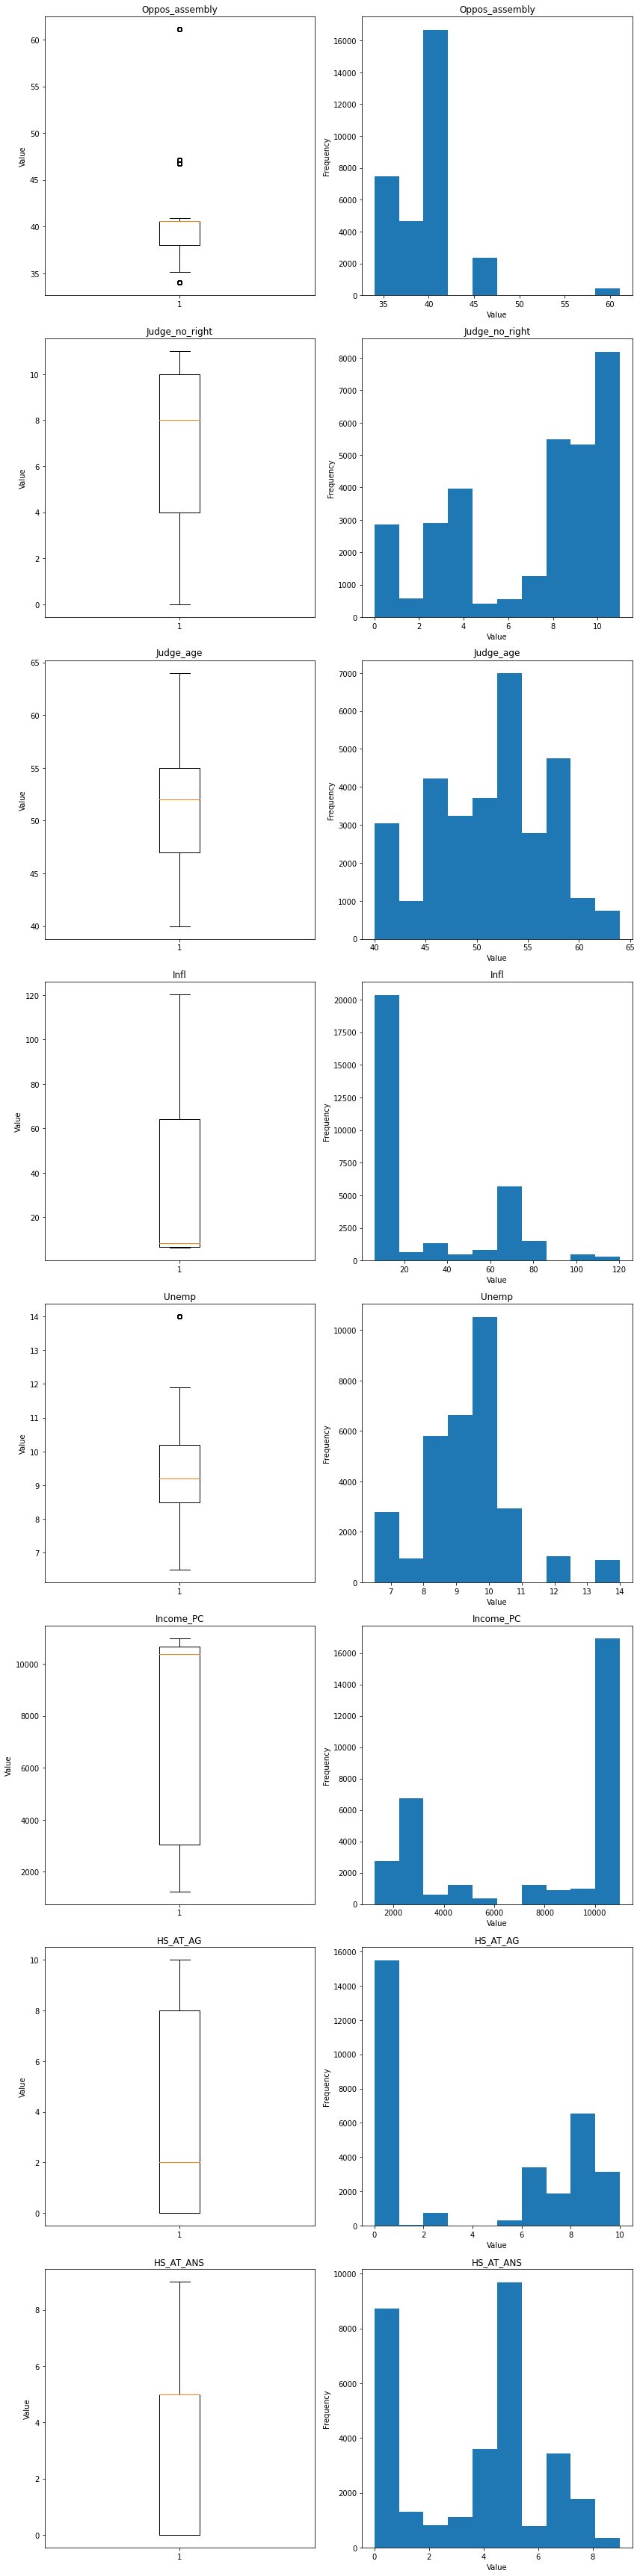

In [47]:
# Create subplots for box plots and histograms
fig, axes = plt.subplots(nrows=len(df_num.columns), ncols=2, figsize=(12, 6 * len(df_num.columns)))

for i, column in enumerate(df_num.columns):
    # Box plot
    axes[i, 0].boxplot(df_num[column])
    axes[i, 0].set_title(column)
    axes[i, 0].set_ylabel('Value')
    
    # Histogram
    axes[i, 1].hist(df_num[column], bins=10)
    axes[i, 1].set_title(column)
    axes[i, 1].set_xlabel('Value')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


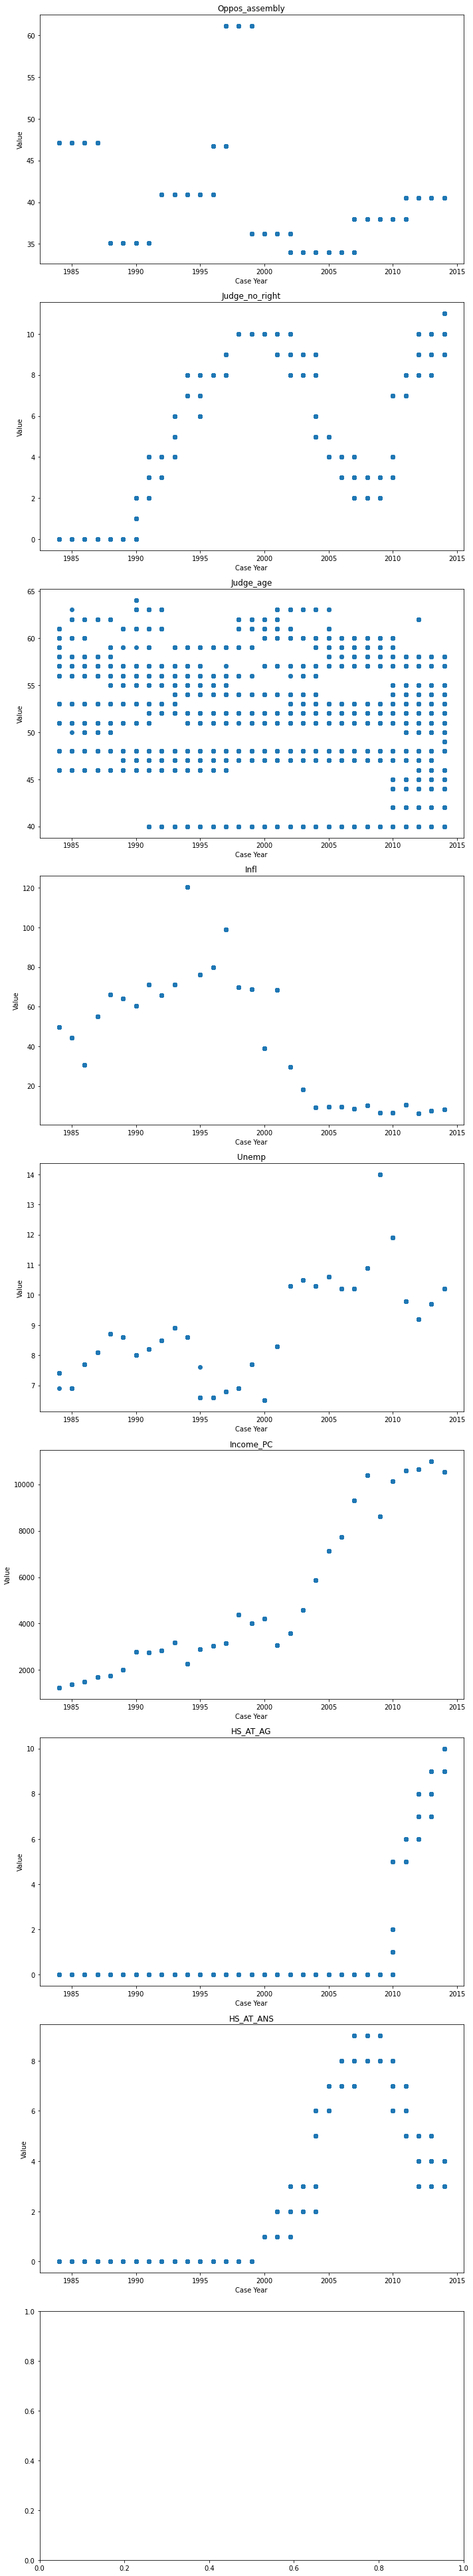

In [48]:
# Include Case_year column in df_num
df_num.loc[:, 'Case_year'] = df.loc[:, 'Case_year'] #Because there is no time variables in df_num, I first include Case_year from df to df_num here

# Create scatter plots for each column in df_num
fig, axes = plt.subplots(nrows=len(df_num.columns), figsize=(10, 6 * len(df_num.columns)))

x = df_num['Case_year']  # Use Case_year column as x-axis

for i, column in enumerate(df_num.columns):
    if column != 'Case_year':
        axes[i].scatter(x, df_num[column])
        axes[i].set_title(column)
        axes[i].set_xlabel('Case Year')
        axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()


# Results suggest that there are no outliers in numerical variables.

Outliers are typically associated with numerical variables. Since Categorical variables do not have a natural ordering or quantitative scale as in numerical variables, the analysis of outliers does not directly apply to categorical variables.

So, instead of checking for outliers, we will focus on categorical variables to understand the distribution and frequencies of the different categories. In order to do so, we will use common visualization techniques for categorical variables from bar charts and pie charts to frequency tables providing insights into the distribution and proportions of each category.

In [49]:
#Define caetogircal variables as df1_cat dropping numerical columns in df1
df_cat = df.drop(df_num.columns, axis=1)
df_cat

,Vote,Leg_right,Petit_president,Petit_right,Gov_structure,Gov_right,President_right,Norm_type,Against_vote,CB_AT_IDEO,...,y2005,y2006,y2007,y2008,y2010,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
0,0.0,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1.0,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31551,0.0,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31552,0.0,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31553,1.0,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31554,0.0,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0


In [50]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31556 entries, 0 to 31555
Columns: 108 entries, Vote to HS_AT_OTHERS
dtypes: float64(107), int64(1)
memory usage: 26.2 MB


In [51]:
missing_values = df_cat.isnull().sum()
missing_values

Vote               0
Leg_right          0
Petit_president    0
Petit_right        0
Gov_structure      0
                  ..
HS_AT_SD           0
HS_AT_TO           0
HS_AT_KE           0
HS_AT_FK           0
HS_AT_OTHERS       0
Length: 108, dtype: int64

In [52]:
# Include Case_year column in df_cat 
df_cat.loc[:, 'Case_year'] = df.loc[:, 'Case_year'] #Because there is no time variables in df_cat, I first include Case_year from df to df_cat here


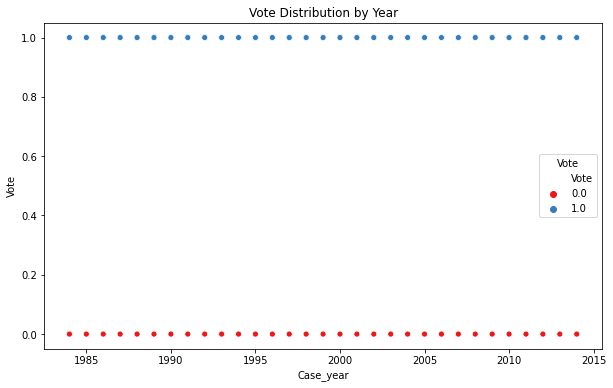

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cat, x='Case_year', y='Vote', hue='Vote', palette='Set1')

plt.title('Vote Distribution by Year')
plt.xlabel('Case_year')
plt.ylabel('Vote')
plt.legend(title='Vote')
plt.show()


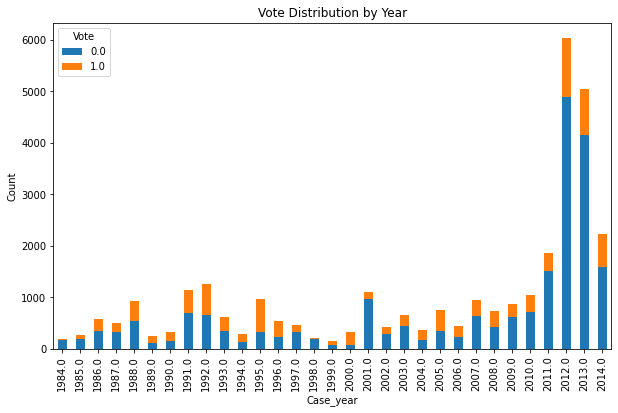

In [54]:
# Group the data by Case_year and Vote and count the frequency of each category
vote_counts = df_cat.groupby(['Case_year', 'Vote']).size().unstack()
# Plot the bar chart
vote_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Vote Distribution by Year')
plt.xlabel('Case_year')
plt.ylabel('Count')
plt.legend(title='Vote')
plt.show()

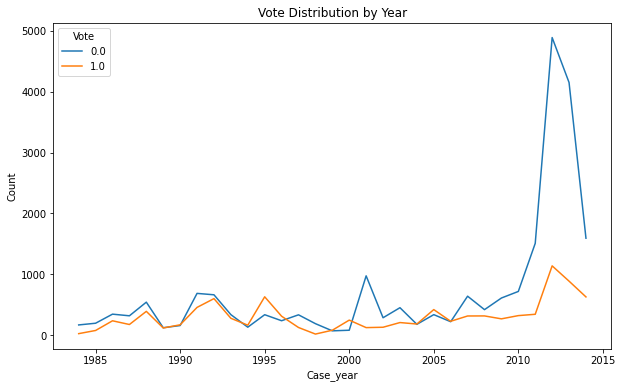

In [55]:
# Group the data by Case_year and Vote and count the frequency of each category
vote_counts = df_cat.groupby(['Case_year', 'Vote']).size().unstack()

# Plot the line chart
vote_counts.plot(kind='line', figsize=(10, 6))
plt.title('Vote Distribution by Year')
plt.xlabel('Case_year')
plt.ylabel('Count')
plt.legend(title='Vote')
plt.show()


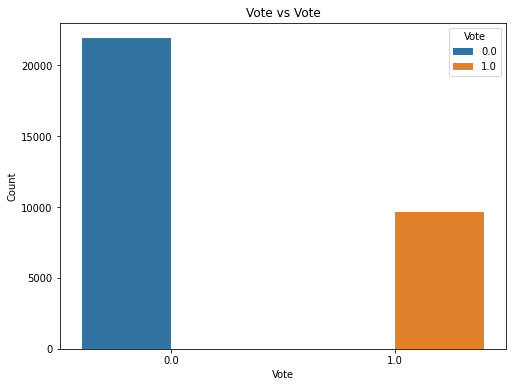

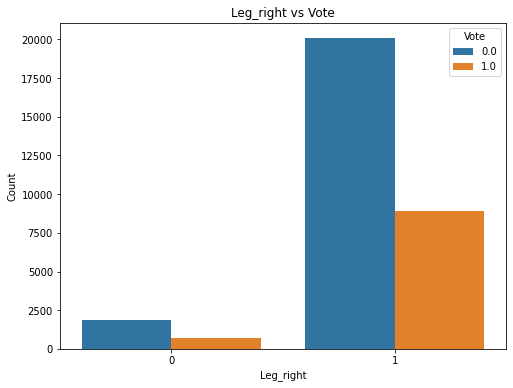

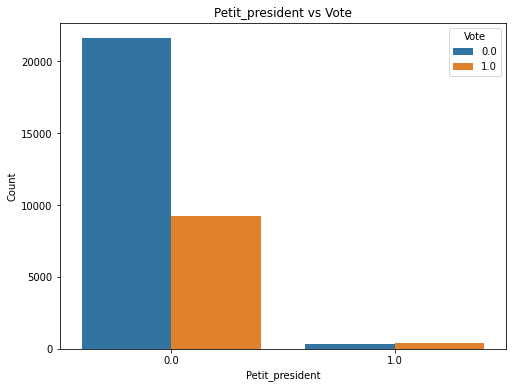

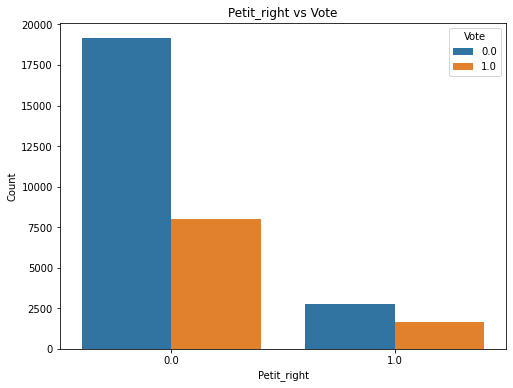

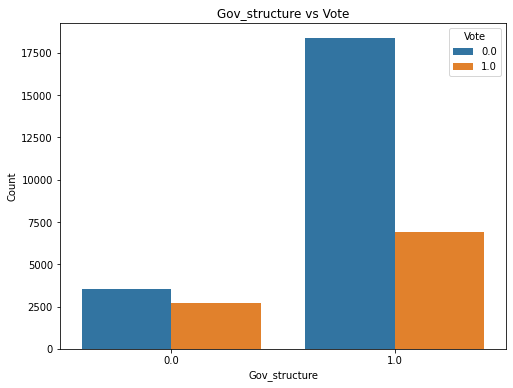

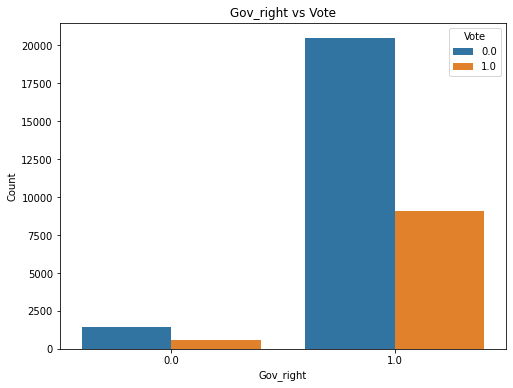

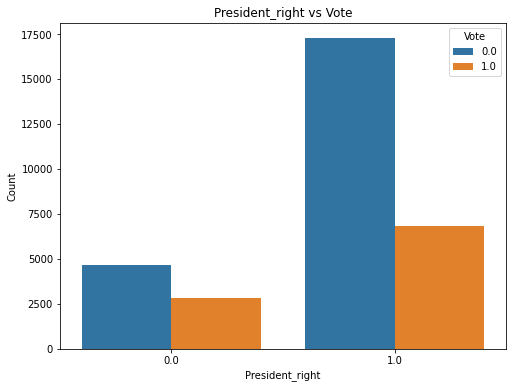

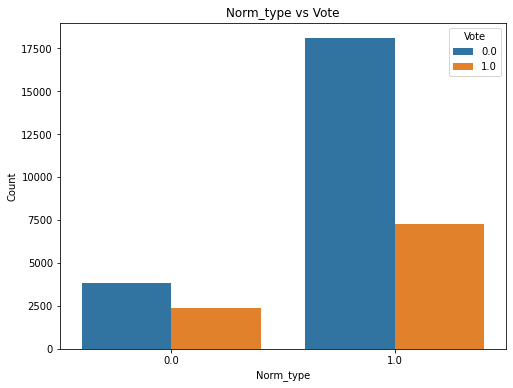

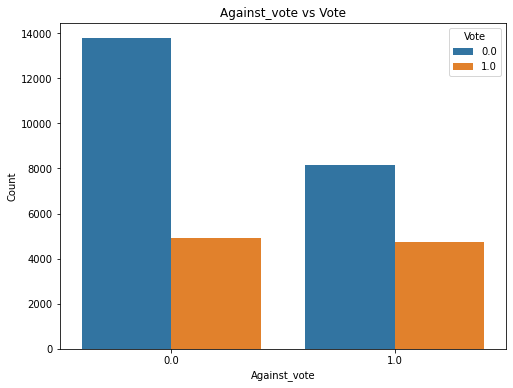

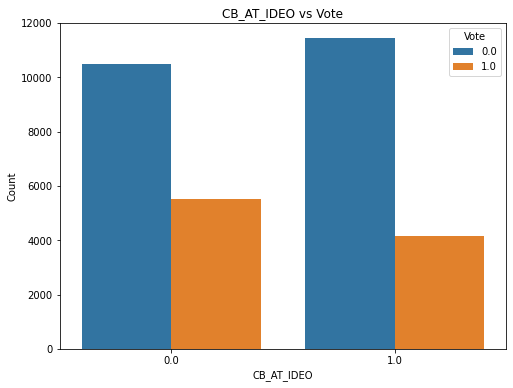

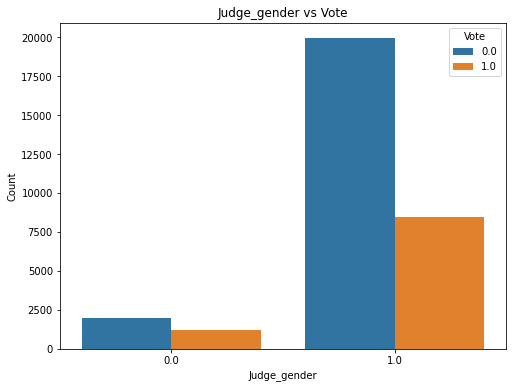

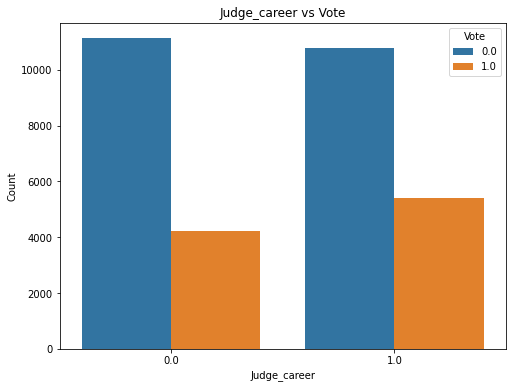

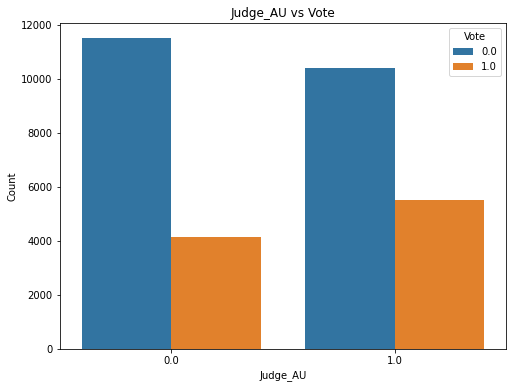

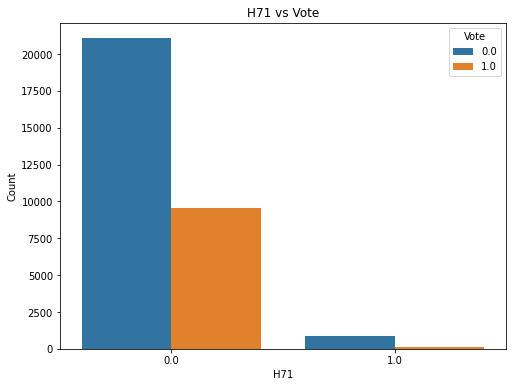

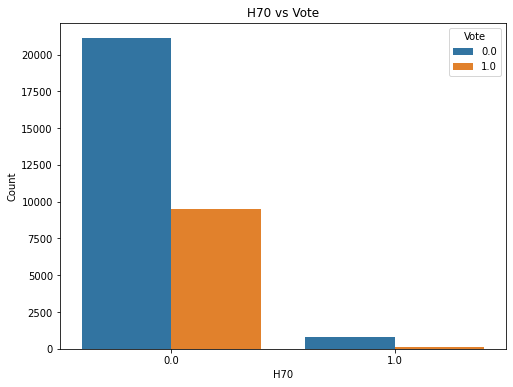

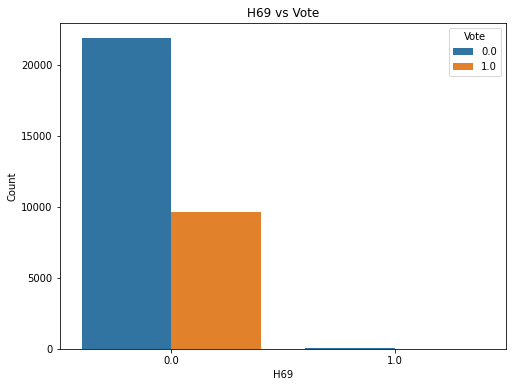

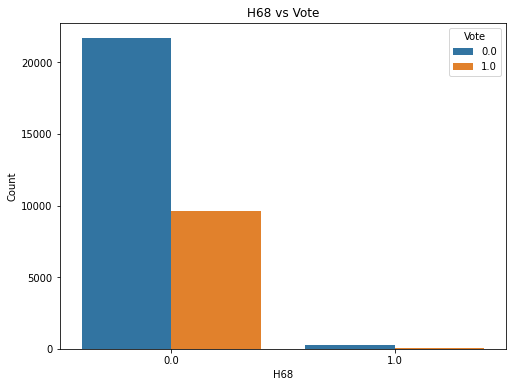

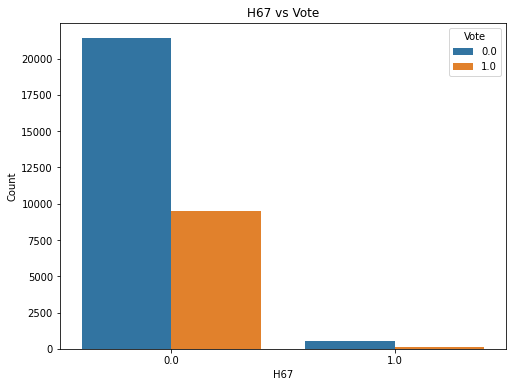

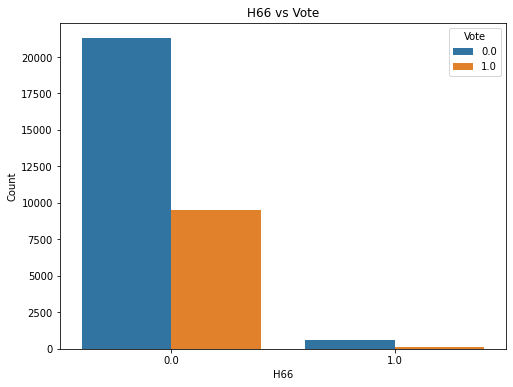

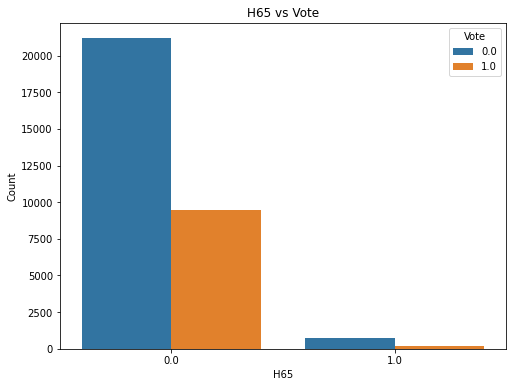

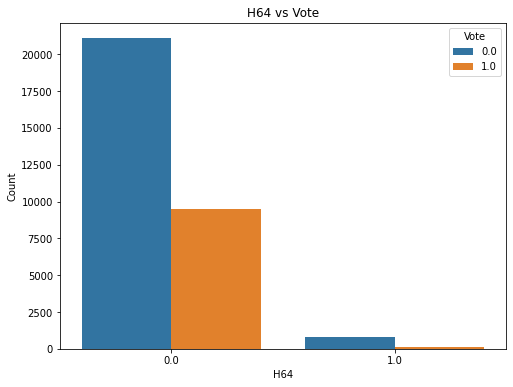

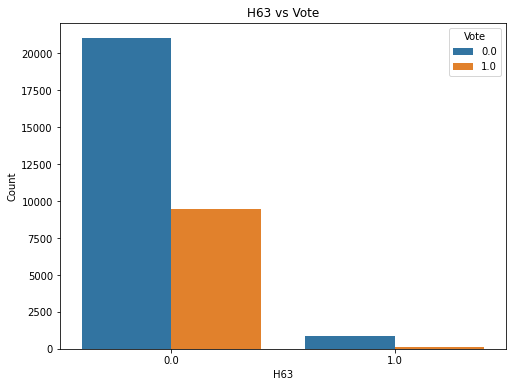

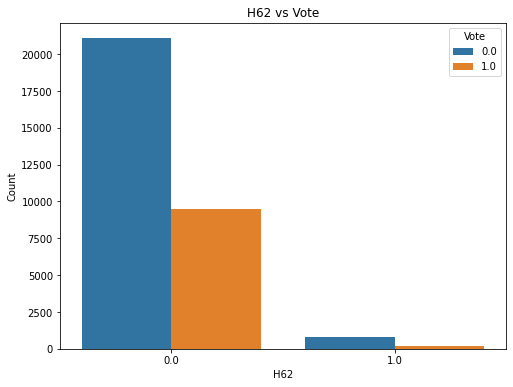

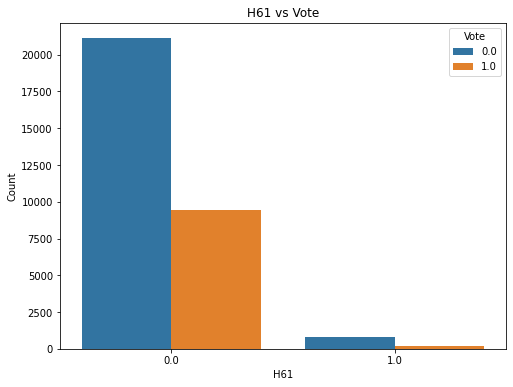

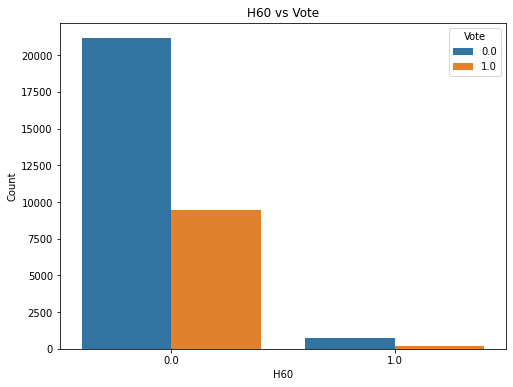

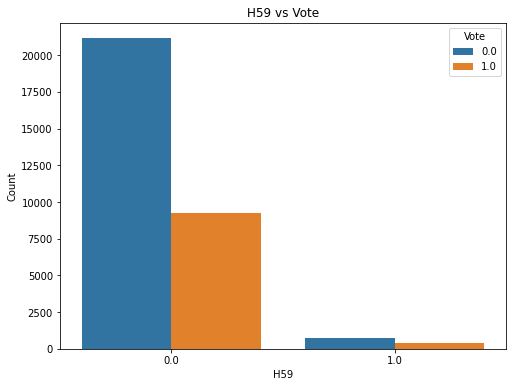

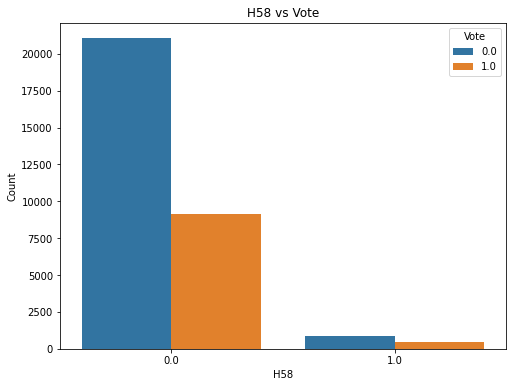

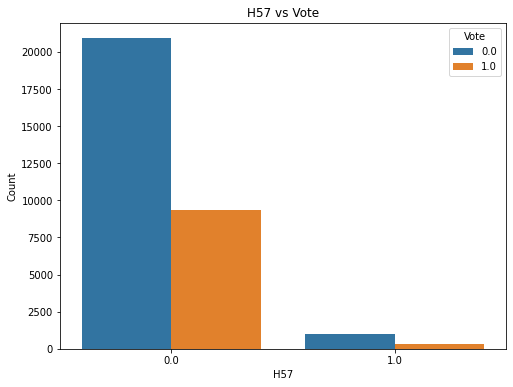

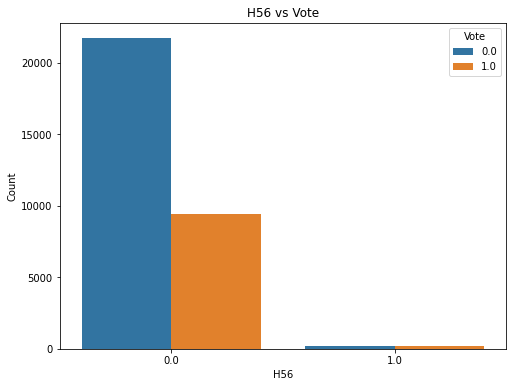

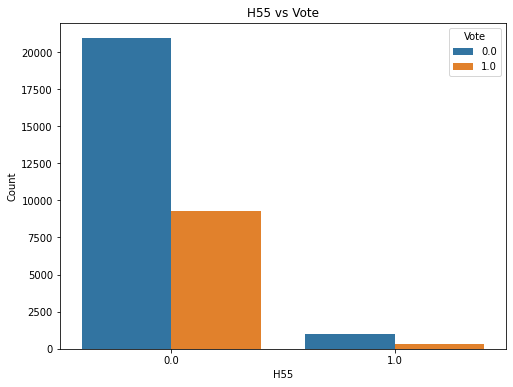

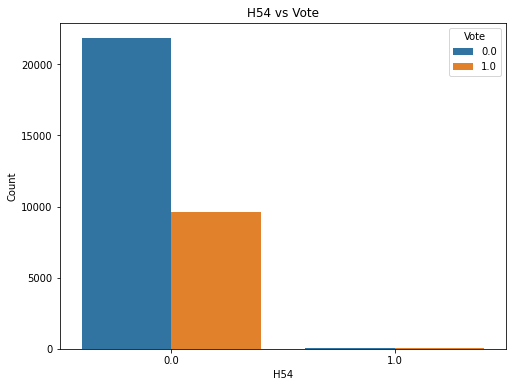

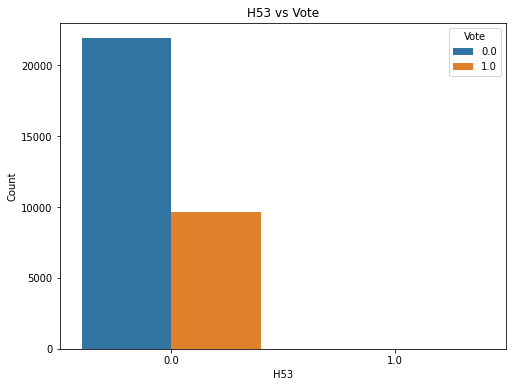

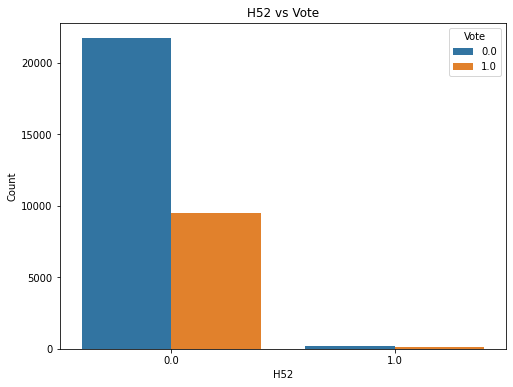

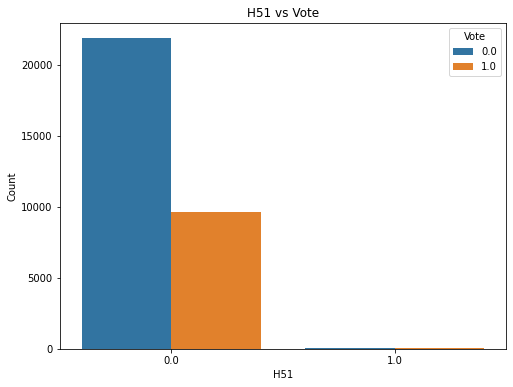

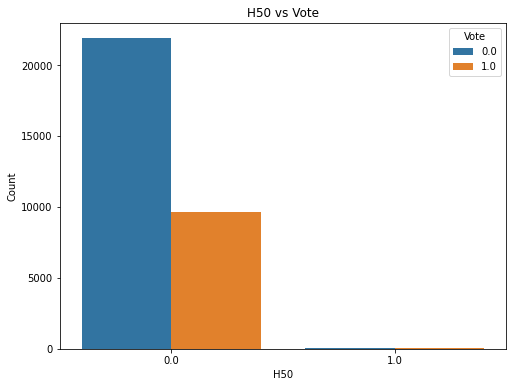

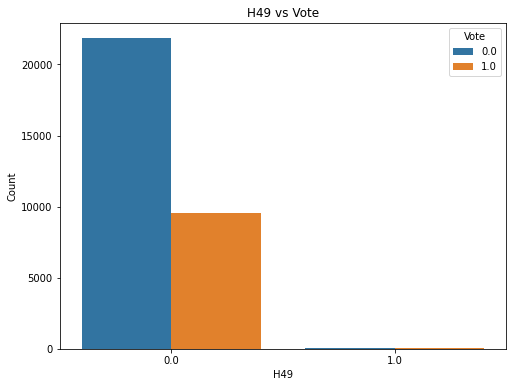

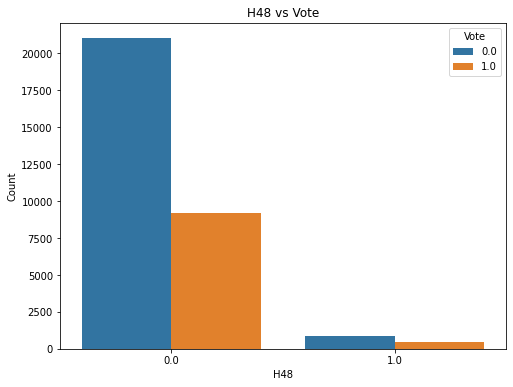

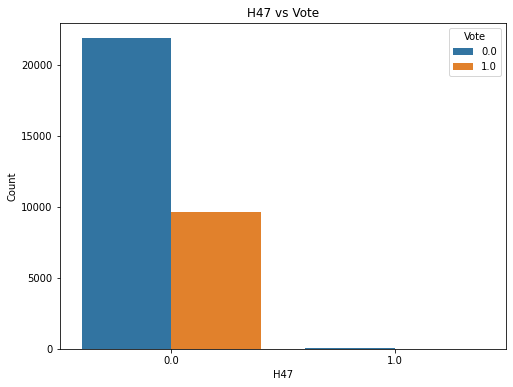

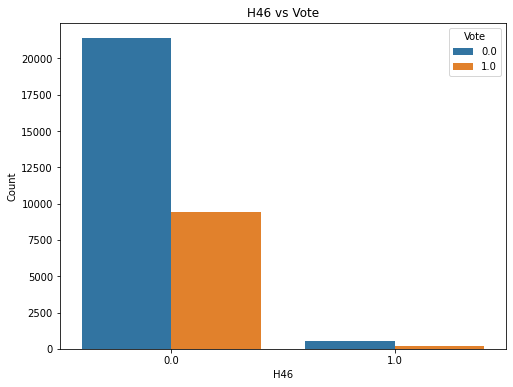

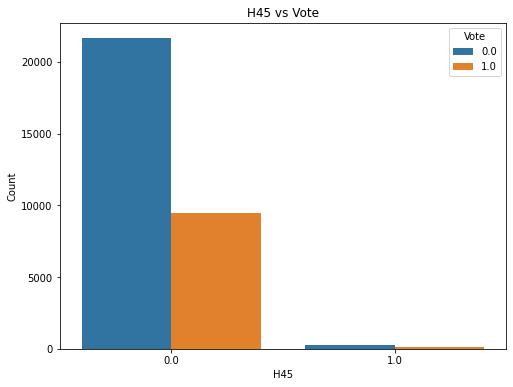

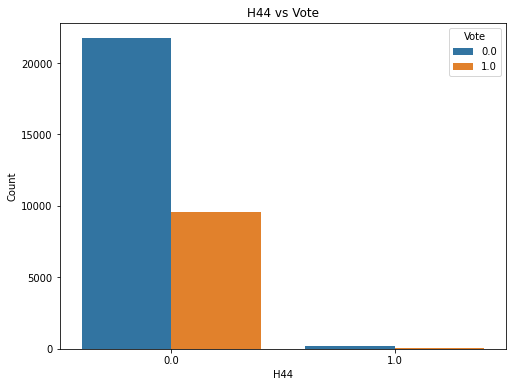

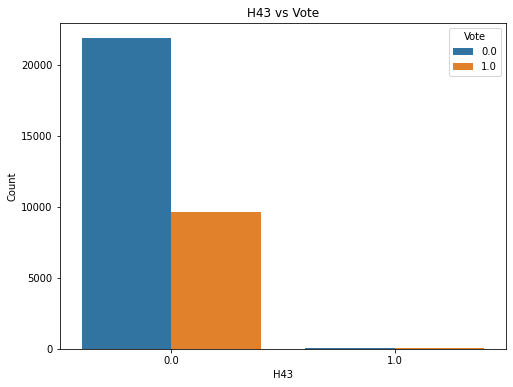

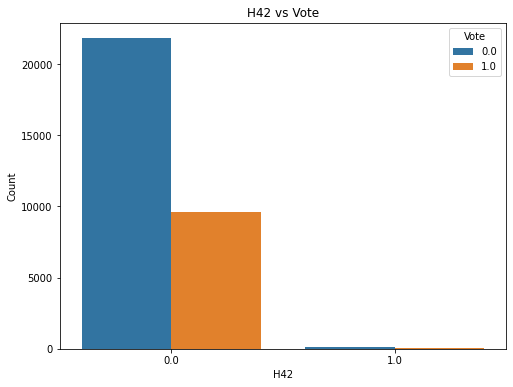

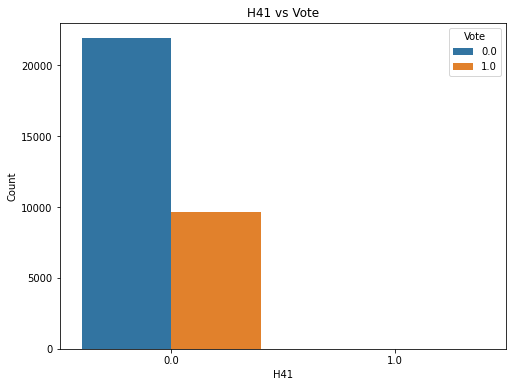

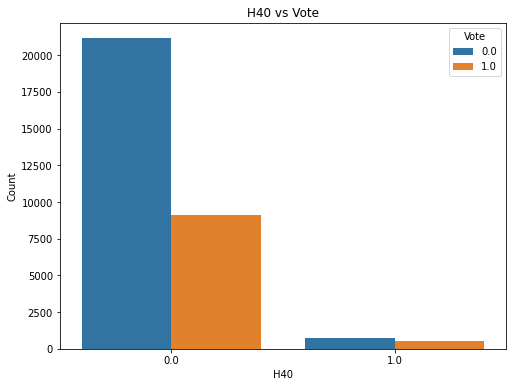

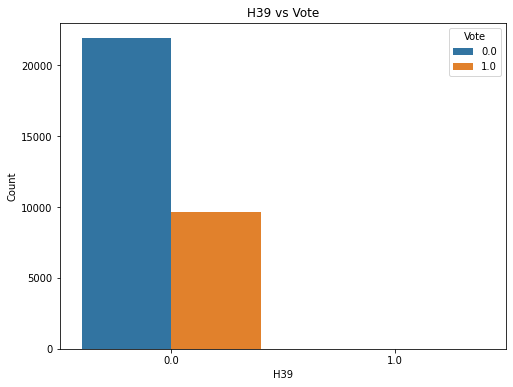

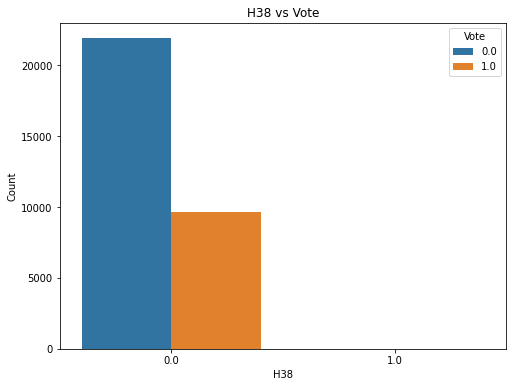

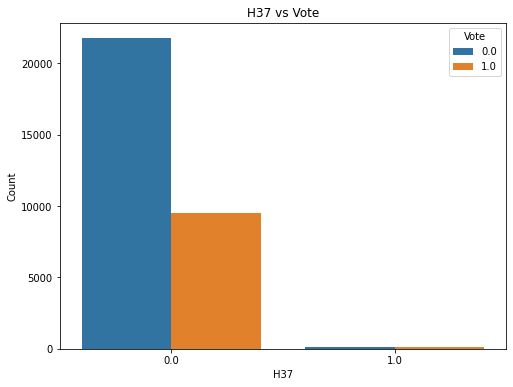

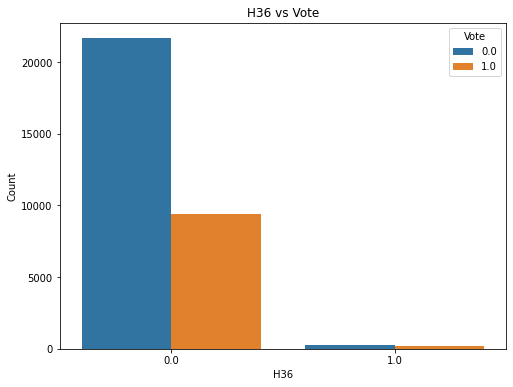

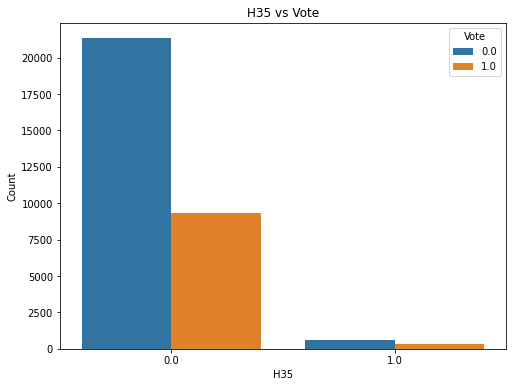

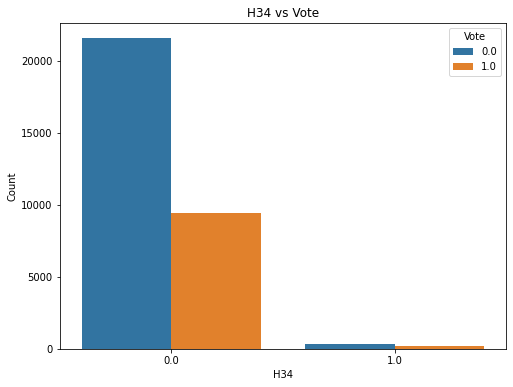

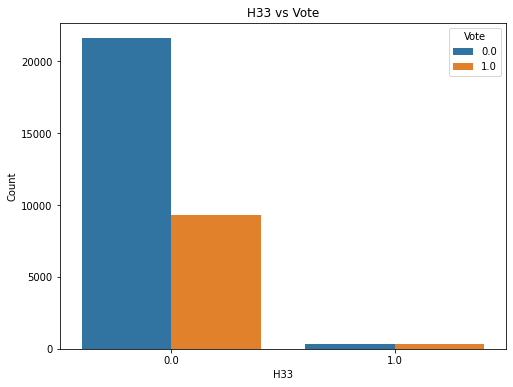

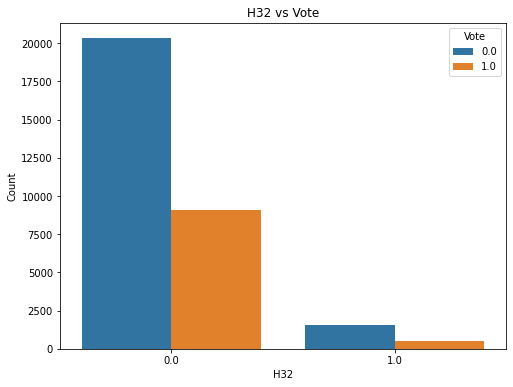

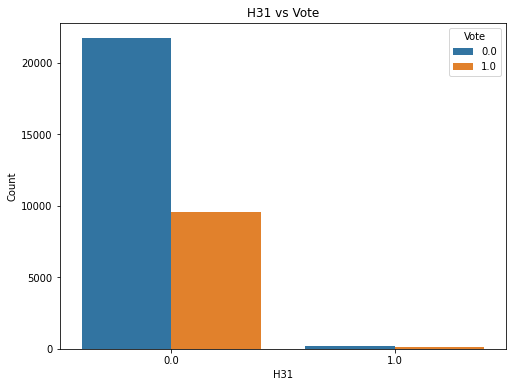

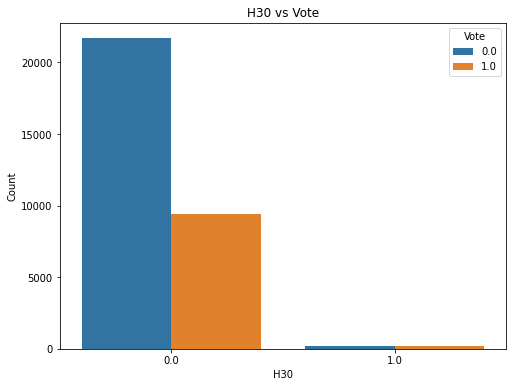

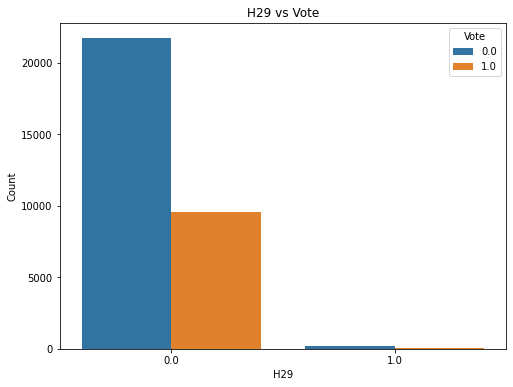

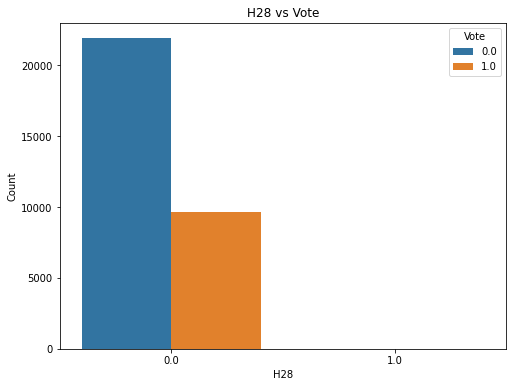

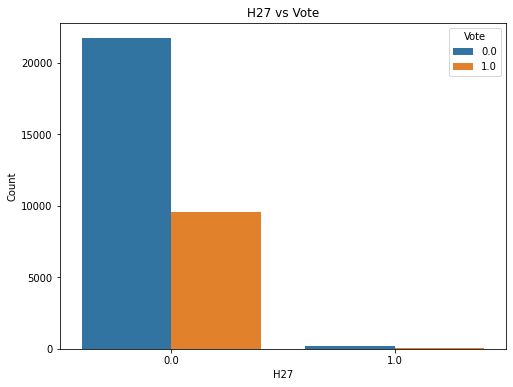

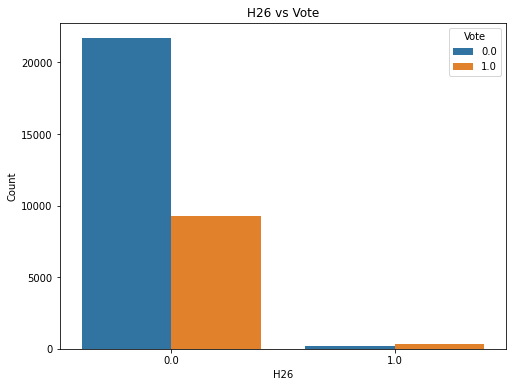

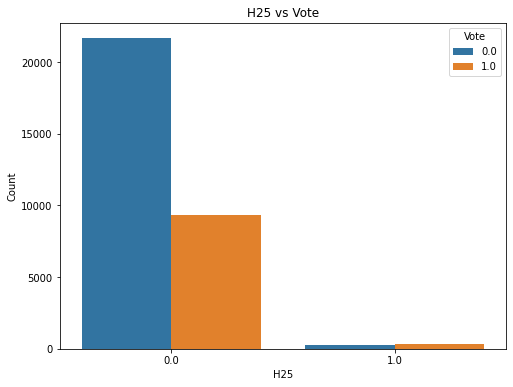

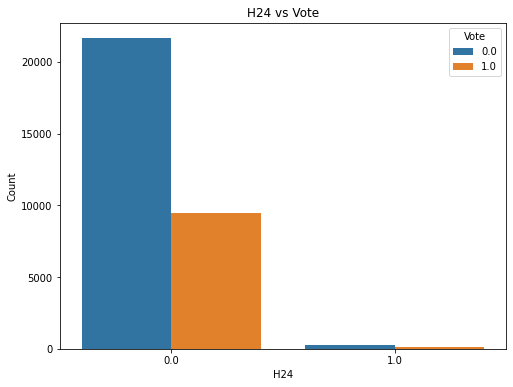

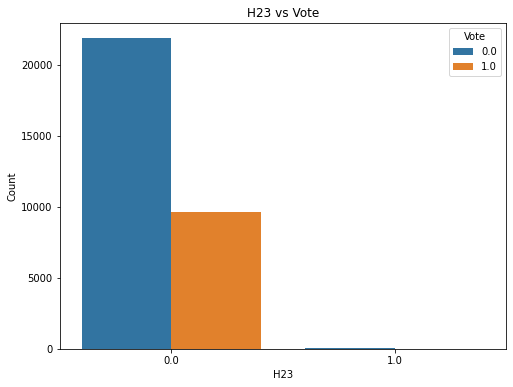

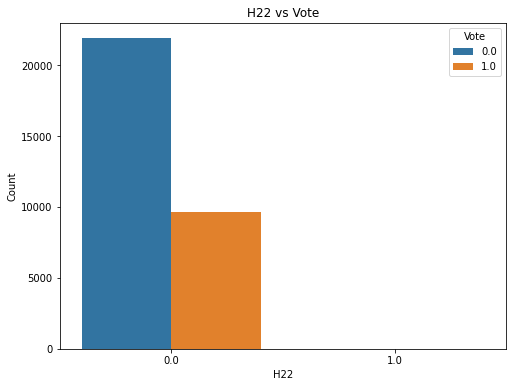

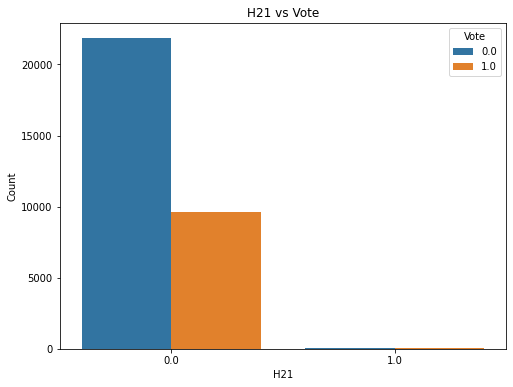

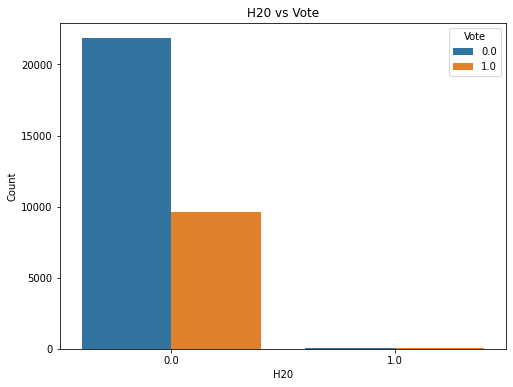

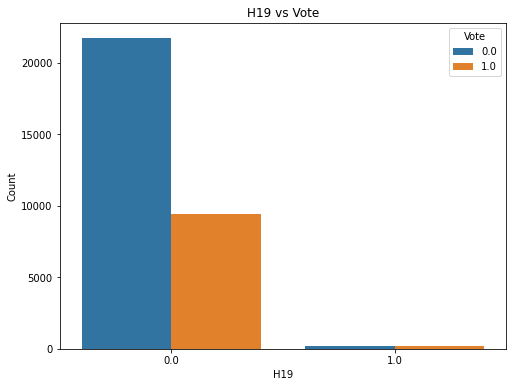

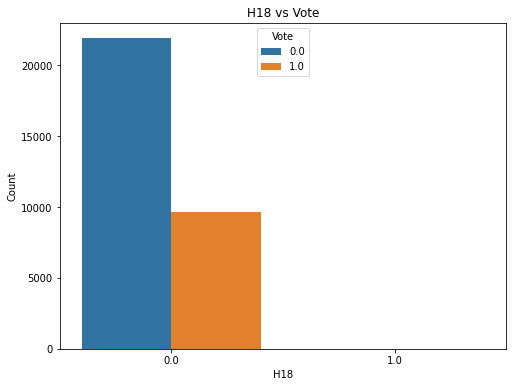

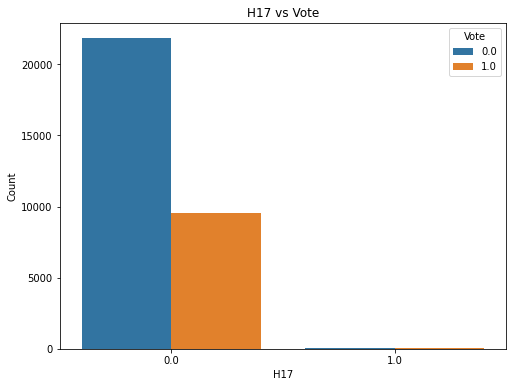

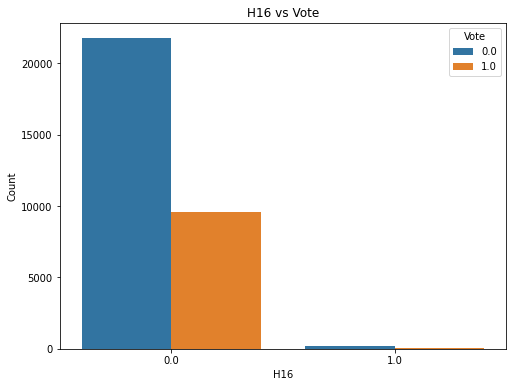

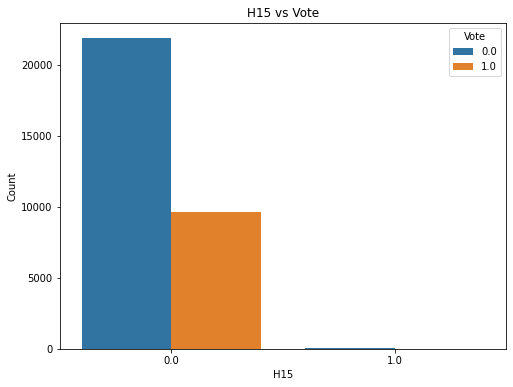

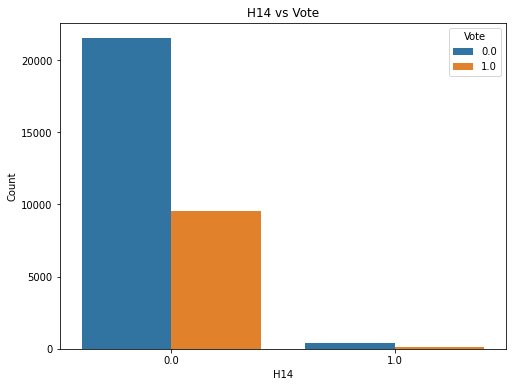

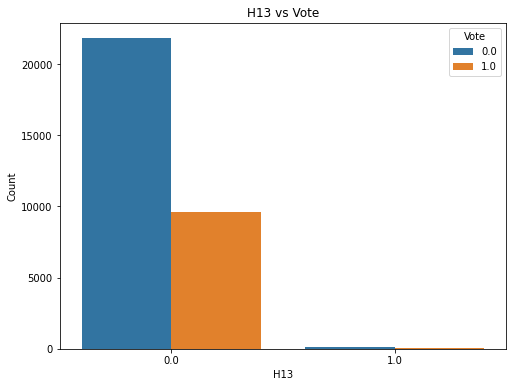

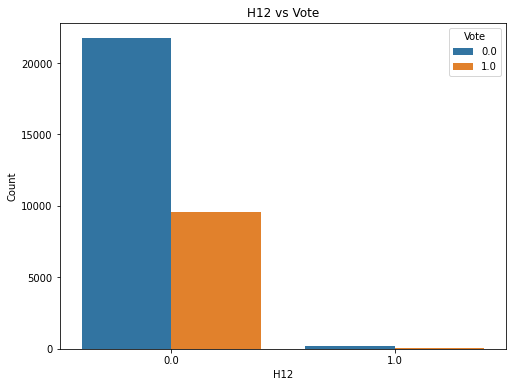

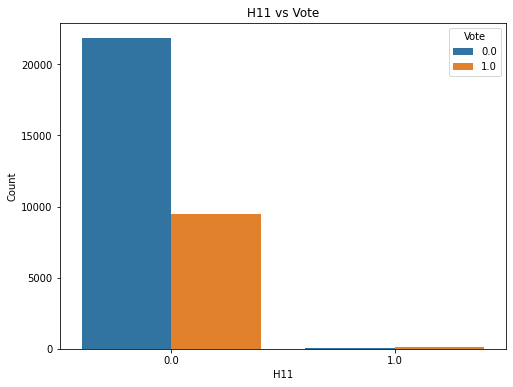

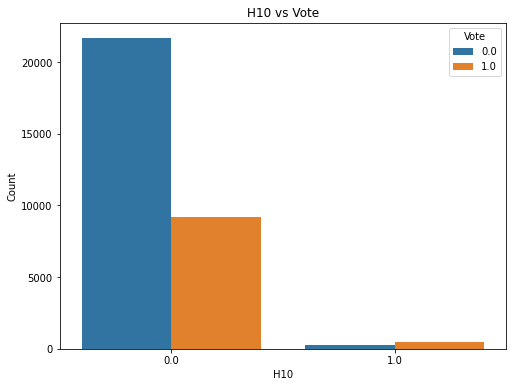

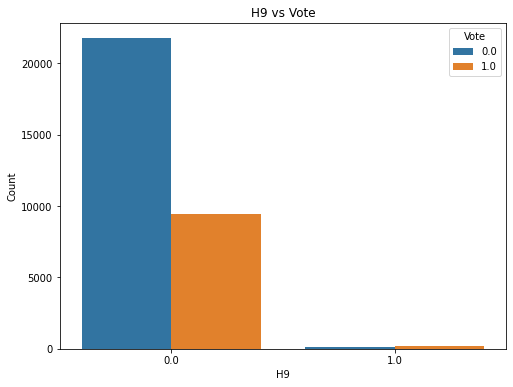

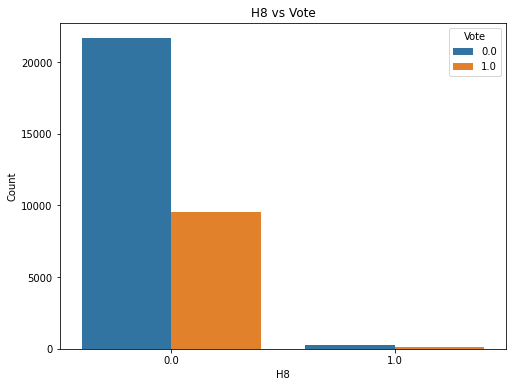

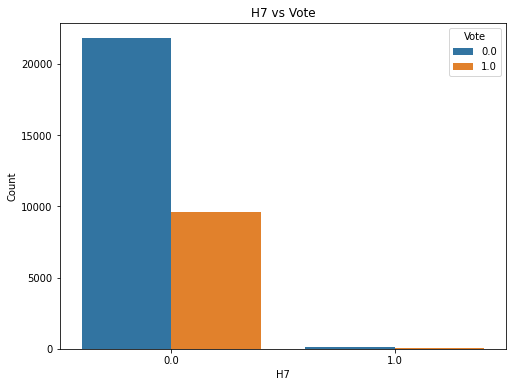

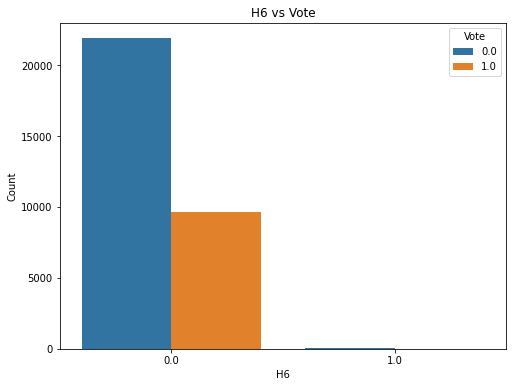

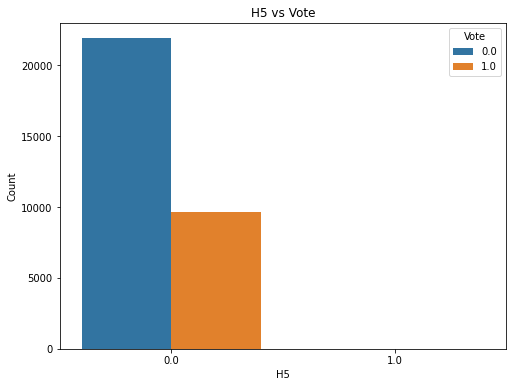

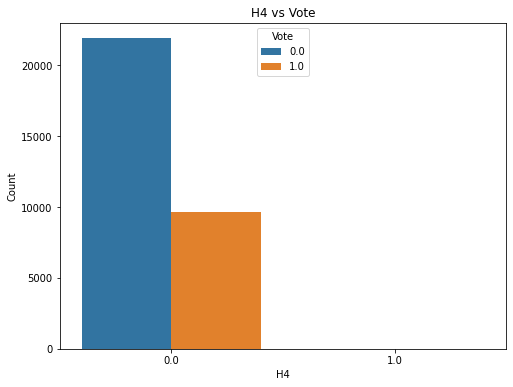

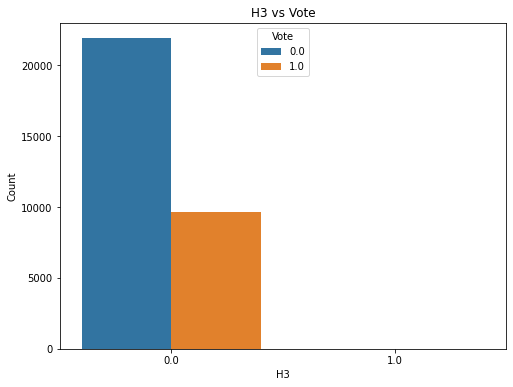

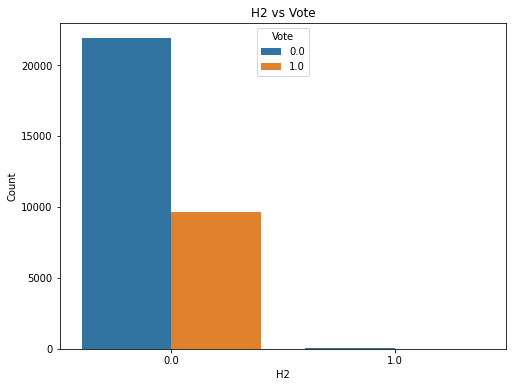

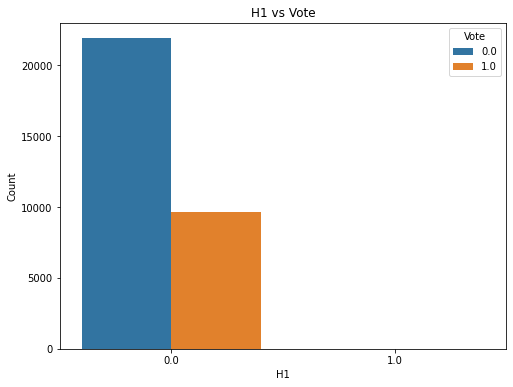

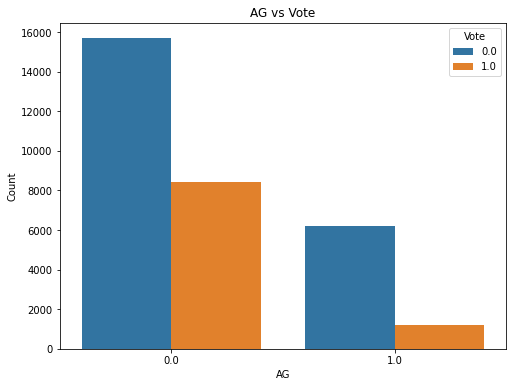

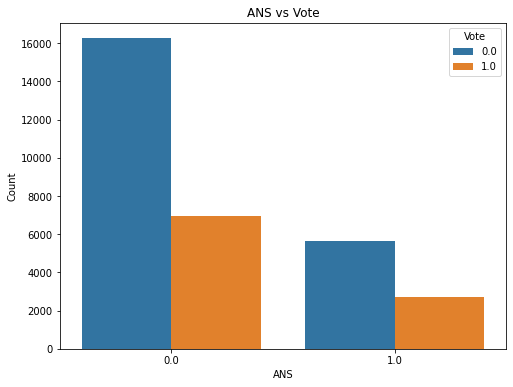

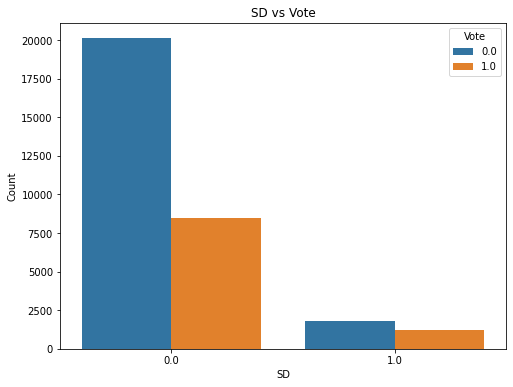

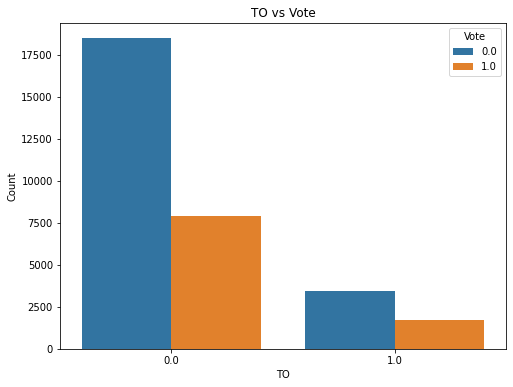

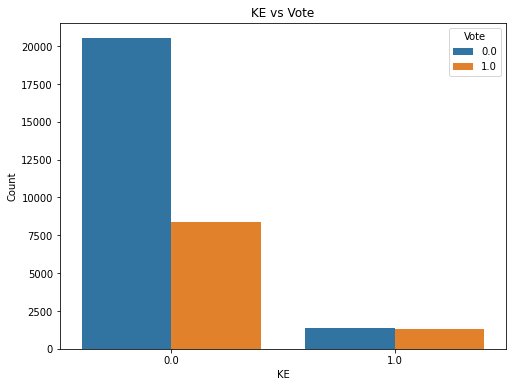

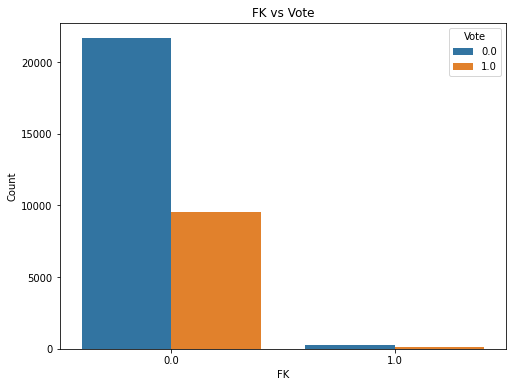

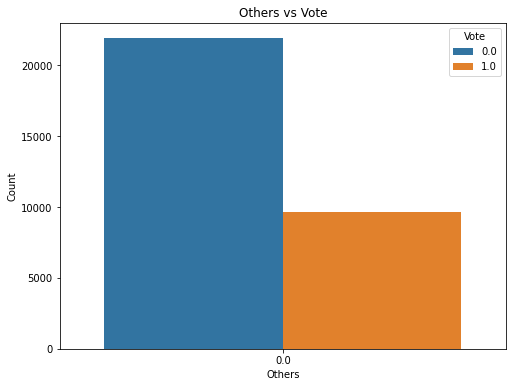

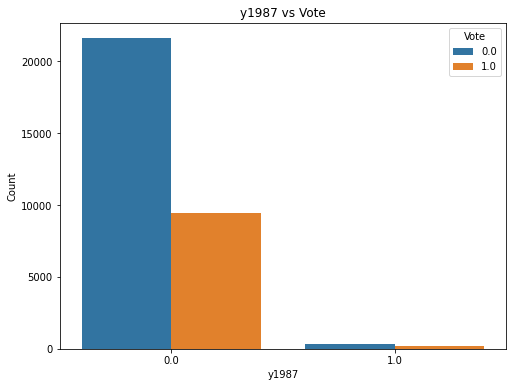

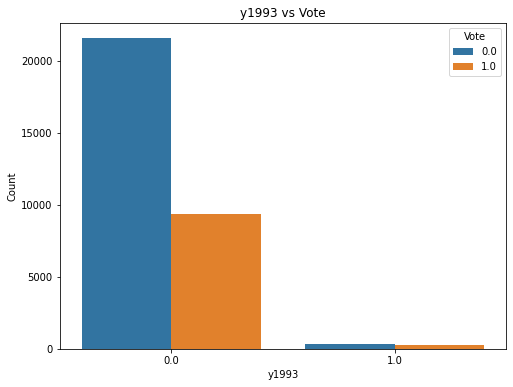

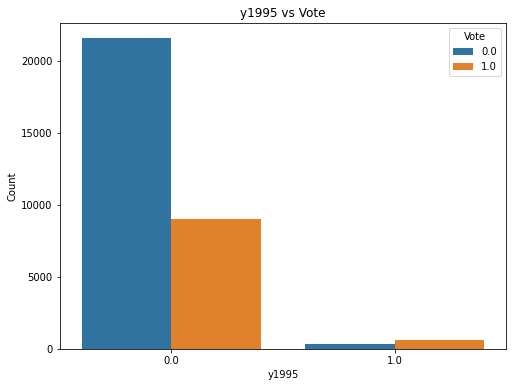

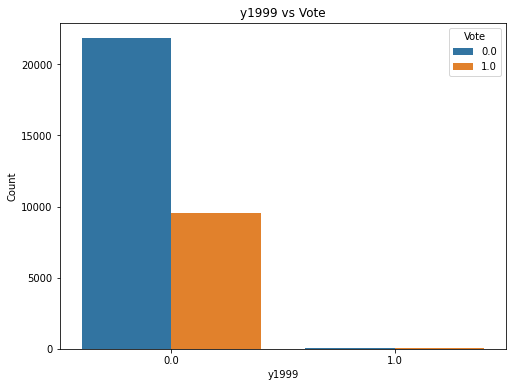

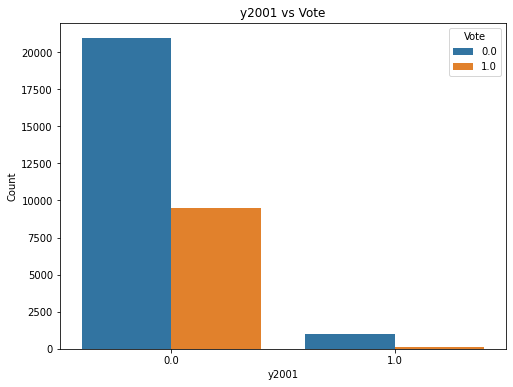

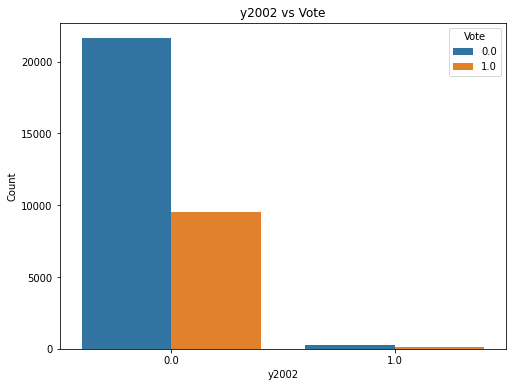

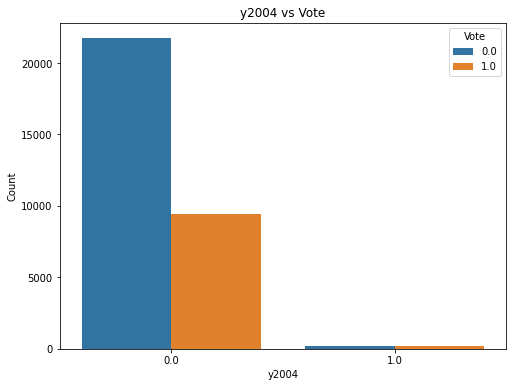

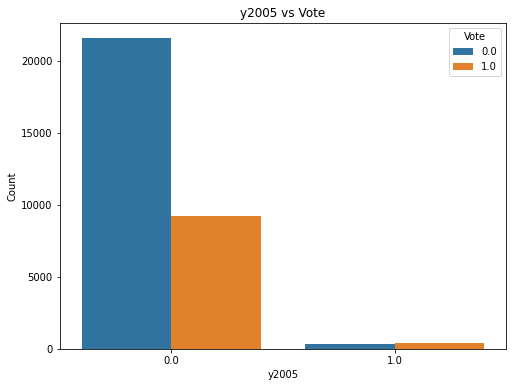

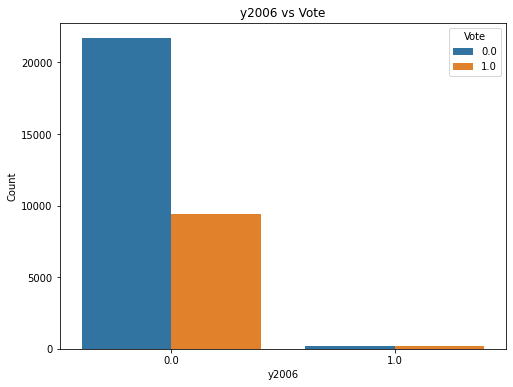

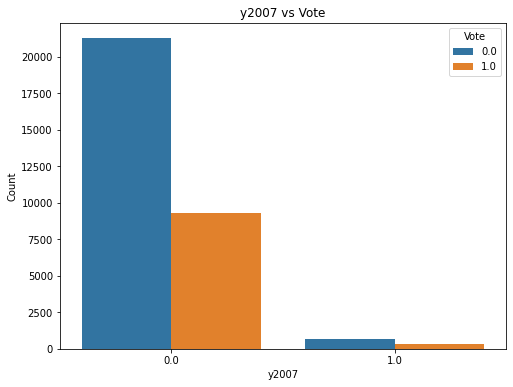

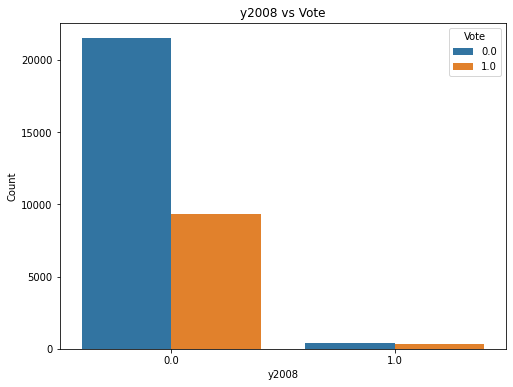

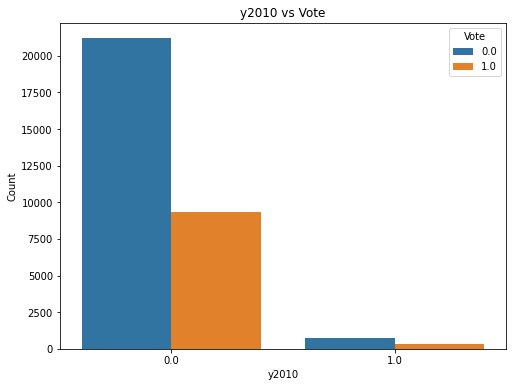

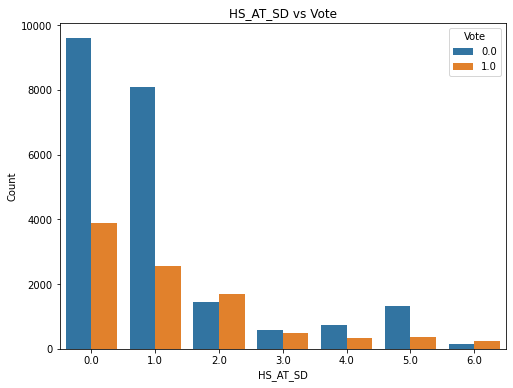

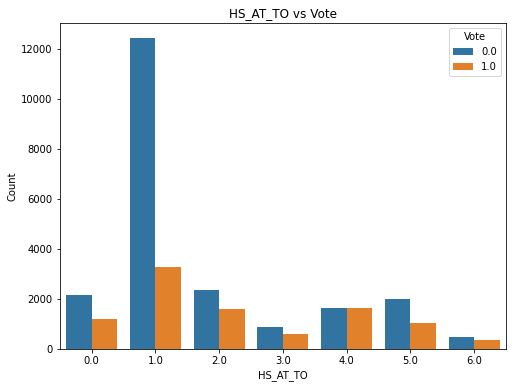

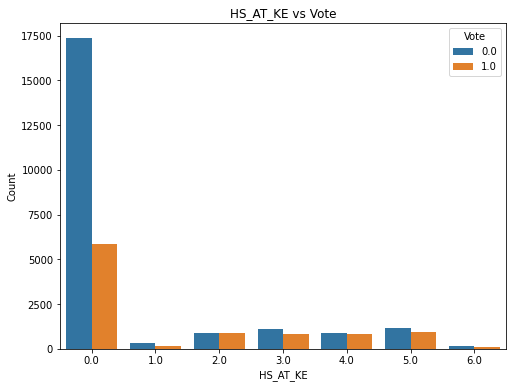

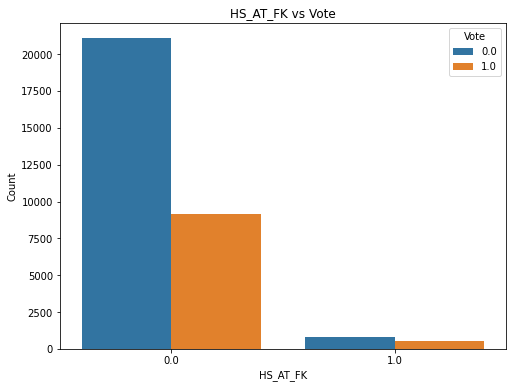

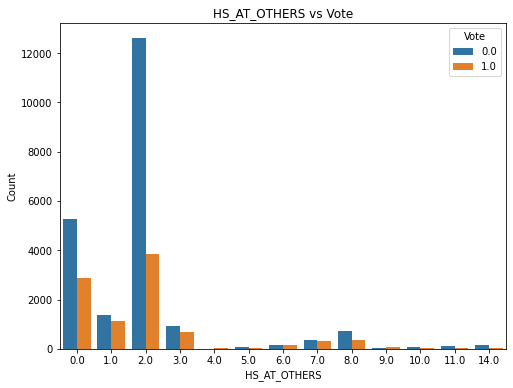

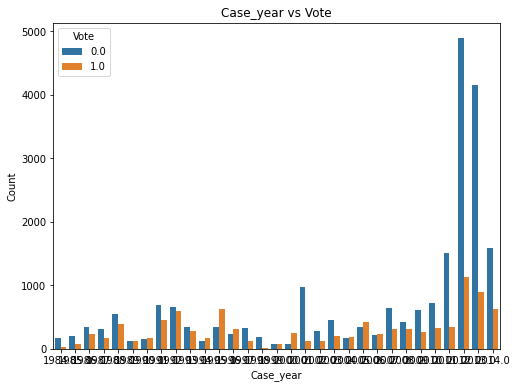

In [56]:
for var in df_cat.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_cat, x=var, hue='Vote')
    plt.title(f'{var} vs Vote')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Vote')
    plt.show()

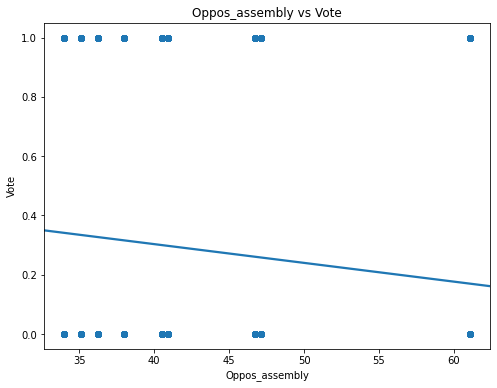

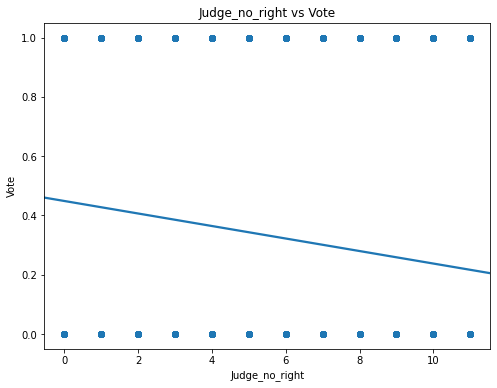

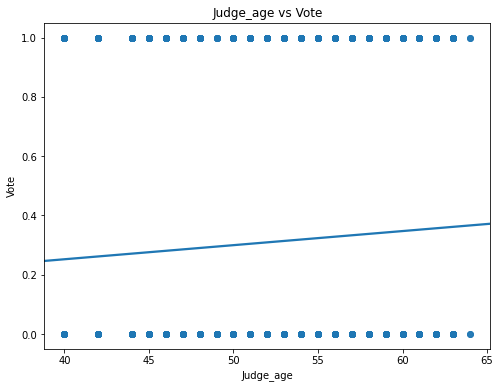

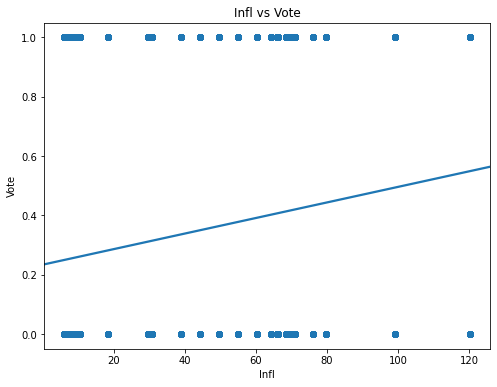

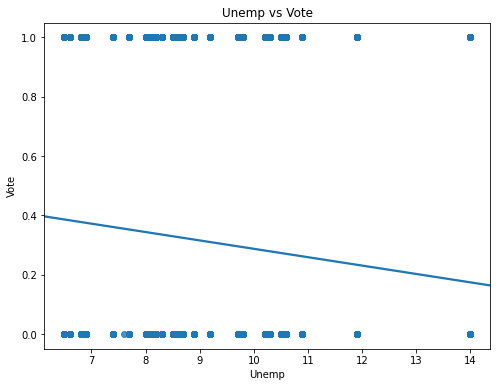

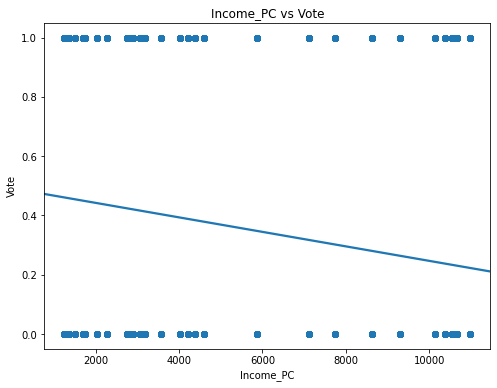

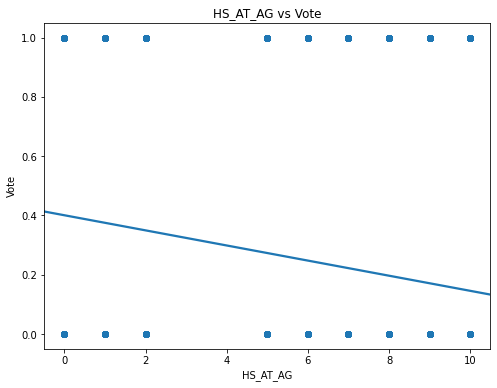

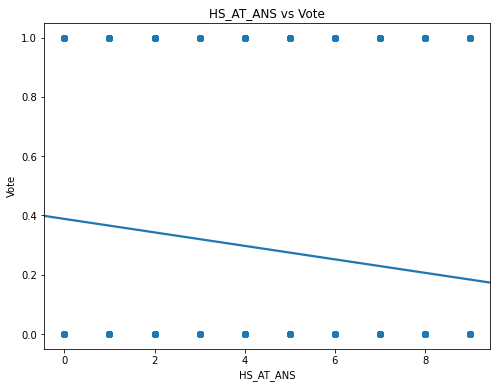

In [57]:
#Check the relationship between vote and numerical variables
# Create scatter plots
numerical_vars = ['Oppos_assembly', 'Judge_no_right', 'Judge_age', 'Infl', 'Unemp', 'Income_PC', 'HS_AT_AG', 'HS_AT_ANS']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=df, x=var, y='Vote', ci=None)
    plt.title(f'{var} vs Vote')
    plt.xlabel(var)
    plt.ylabel('Vote')
    plt.show()

# Create violin plots 
#numerical_vars = ['Oppos_assembly', 'Judge_no_right', 'Judge_age', 'Infl', 'Unemp', 'Income_PC', 'HS_AT_AG', 'HS_AT_ANS']

#for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='Vote', y=var)
    plt.title(f'{var} by Vote')
    plt.xlabel('Vote')
    plt.ylabel(var)
    plt.show()
    
# Create swarm plots
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.swarmplot(data=df, x='Vote', y=var)
    plt.title(f'{var} by Vote')
    plt.xlabel('Vote')
    plt.ylabel(var)
    plt.show()


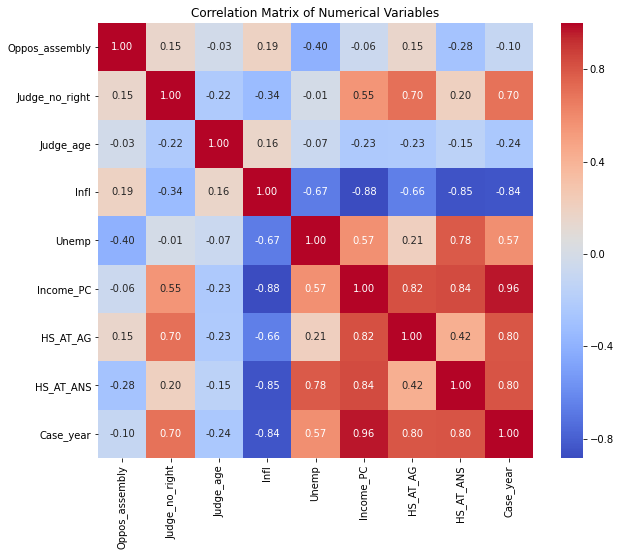

In [58]:
#Check correlation for df_num
correlation_matrix = df_num.corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [59]:
# Normalize numerical variables 
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the numerical variables
df_num_normalized = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Display the normalized numerical variables
df_num_normalized.head()


,Oppos_assembly,Judge_no_right,Judge_age,Infl,Unemp,Income_PC,HS_AT_AG,HS_AT_ANS,Case_year
0,0.241787,0.818182,0.458333,0.017618,0.493333,0.954455,0.9,0.333333,1.0
1,0.241787,0.818182,0.083333,0.017618,0.493333,0.954455,0.9,0.333333,1.0
2,0.241787,0.818182,0.333333,0.017618,0.493333,0.954455,0.9,0.333333,1.0
3,0.241787,0.818182,0.500000,0.017618,0.493333,0.954455,0.9,0.333333,1.0
4,0.241787,0.818182,0.625000,0.017618,0.493333,0.954455,0.9,0.333333,1.0


In [60]:
# Concatenate numerical and categorical variables as df_final
df_final = pd.concat([df_num_normalized, df_cat], axis=1)
# Display the concatenated DataFrame
df_final.head()

,Oppos_assembly,Judge_no_right,Judge_age,Infl,Unemp,Income_PC,HS_AT_AG,HS_AT_ANS,Case_year,Vote,...,y2006,y2007,y2008,y2010,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS,Case_year
0,0.241787,0.818182,0.458333,0.017618,0.493333,0.954455,0.9,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2014.0
1,0.241787,0.818182,0.083333,0.017618,0.493333,0.954455,0.9,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2014.0
2,0.241787,0.818182,0.333333,0.017618,0.493333,0.954455,0.9,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2014.0
3,0.241787,0.818182,0.500000,0.017618,0.493333,0.954455,0.9,0.333333,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2014.0
4,0.241787,0.818182,0.625000,0.017618,0.493333,0.954455,0.9,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2014.0


In [61]:
#Drop Case_year and Vote_numeric
df_final = df_final.drop(['Case_year'], axis=1)
# Display the updated DataFrame
df_final.head()

,Oppos_assembly,Judge_no_right,Judge_age,Infl,Unemp,Income_PC,HS_AT_AG,HS_AT_ANS,Vote,Leg_right,...,y2005,y2006,y2007,y2008,y2010,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
0,0.241787,0.818182,0.458333,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.241787,0.818182,0.083333,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.241787,0.818182,0.333333,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.241787,0.818182,0.500000,0.017618,0.493333,0.954455,0.9,0.333333,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.241787,0.818182,0.625000,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [62]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31556 entries, 0 to 31555
Columns: 116 entries, Oppos_assembly to HS_AT_OTHERS
dtypes: float64(115), int64(1)
memory usage: 27.9 MB


In [63]:
df_final['Vote'].unique()

array([0., 1.])

In [64]:
df_final['Vote'].value_counts()

0.0    21915
1.0     9641
Name: Vote, dtype: int64

# Estimation LOGIT MODELS

In this section, I will run different logit models to better understand the determinants of judge votes. Vote is dependent variable in all the models. However, I will introduce different models under various scenarios including political, economic, and socio-demographic features/variables, which might be influential on vote. By doing so, I aim to reveal the determinants of judge behaviour and thus judicial independence in the Constitutional Court.  

In [65]:
# Political features
Vote_pol = logit("Vote ~ Gov_structure + Gov_right + Oppos_assembly + Leg_right + Petit_president + President_right", df_final).fit()
print(Vote_pol.summary())
Vote_pol.pred_table()

Optimization terminated successfully.
         Current function value: 0.581983
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Vote   No. Observations:                31556
Model:                          Logit   Df Residuals:                    31549
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                 0.05441
Time:                        19:09:02   Log-Likelihood:                -18365.
converged:                       True   LL-Null:                       -19422.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7530      0.051    -14.746      0.000      -0.853      -0.653
Gov_structure 

array([[20479.,  1436.],
       [ 7832.,  1809.]])

In [66]:
# Political and socio-demographic features
Vote_pol_sd = logit("Vote ~ Gov_structure + Gov_right + Oppos_assembly + Leg_right + Petit_president + President_right + Judge_age + Judge_gender + Judge_career + Judge_AU", df_final).fit()
print(Vote_pol_sd.summary())
Vote_pol_sd.pred_table()

Optimization terminated successfully.
         Current function value: 0.578056
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Vote   No. Observations:                31556
Model:                          Logit   Df Residuals:                    31545
Method:                           MLE   Df Model:                           10
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                 0.06079
Time:                        19:09:02   Log-Likelihood:                -18241.
converged:                       True   LL-Null:                       -19422.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7371      0.070    -10.478      0.000      -0.875      -0.599
Gov_structure 

array([[20054.,  1861.],
       [ 7455.,  2186.]])

In [67]:
# Political, socio-demographic, and economic features
Vote_pol_sd_econ = logit("Vote ~ Gov_structure + Gov_right + Oppos_assembly + Leg_right + Petit_president + President_right + Judge_age + Judge_gender + Judge_career + Judge_AU + Infl + Unemp + Income_PC", df_final).fit()
print(Vote_pol_sd_econ.summary())
Vote_pol_sd_econ.pred_table()

Optimization terminated successfully.
         Current function value: 0.574101
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Vote   No. Observations:                31556
Model:                          Logit   Df Residuals:                    31542
Method:                           MLE   Df Model:                           13
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                 0.06721
Time:                        19:09:02   Log-Likelihood:                -18116.
converged:                       True   LL-Null:                       -19422.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6718      0.129      5.212      0.000       0.419       0.924
Gov_structure 

array([[20242.,  1673.],
       [ 7520.,  2121.]])

In [68]:
# Margin effects of political, socio-demographic, and economic features
mfx = Vote_pol_sd_econ.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                   Vote
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Gov_structure      -0.2617      0.011    -23.347      0.000      -0.284      -0.240
Gov_right           0.1794      0.017     10.310      0.000       0.145       0.214
Oppos_assembly     -0.4636      0.021    -22.495      0.000      -0.504      -0.423
Leg_right           0.2312      0.015     14.981      0.000       0.201       0.261
Petit_president     0.1055      0.016      6.661      0.000       0.074       0.137
President_right    -0.0181      0.010     -1.774      0.076      -0.038       0.002
Judge_age          -0.0280      0.013     -2.206      0.027      -0.053      -0.003
Judge_gender       -0.0812      0.008     -9.861      0.000      -0.097      -0.065
Judge_ca

In [69]:
# Political, socio-demographic, and economic features with Presidential features 
Vote_whole = logit("Vote ~ Gov_structure + Gov_right + Oppos_assembly + Leg_right + Petit_president + President_right + Judge_age + Judge_gender + Judge_career + Judge_AU + Infl + Unemp + Income_PC + AG + ANS + SD + TO + KE", df_final).fit()
print(Vote_whole.summary())
Vote_whole.pred_table()

Optimization terminated successfully.
         Current function value: 0.569339
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Vote   No. Observations:                31556
Model:                          Logit   Df Residuals:                    31537
Method:                           MLE   Df Model:                           18
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                 0.07495
Time:                        19:09:02   Log-Likelihood:                -17966.
converged:                       True   LL-Null:                       -19422.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5401      0.143      3.766      0.000       0.259       0.821
Gov_structure 

array([[20190.,  1725.],
       [ 7326.,  2315.]])

In [70]:
# Define the models
models = [
    ("Vote_pol", "Vote ~ Gov_structure + Gov_right + Oppos_assembly + Leg_right + Petit_president + President_right"),
    ("Vote_pol_sd", "Vote ~ Gov_structure + Gov_right + Oppos_assembly + Leg_right + Petit_president + President_right + Judge_age + Judge_gender + Judge_career + Judge_AU"),
    ("Vote_pol_sd_econ", "Vote ~ Gov_structure + Gov_right + Oppos_assembly + Leg_right + Petit_president + President_right + Judge_age + Judge_gender + Judge_career + Judge_AU + Infl + Unemp + Income_PC"),
    ("Vote_whole", "Vote ~ Gov_structure + Gov_right + Oppos_assembly + Leg_right + Petit_president + President_right + Judge_age + Judge_gender + Judge_career + Judge_AU + Infl + Unemp + Income_PC + AG + ANS + SD + TO + KE")
]

# Create an empty dataframe to store the results
results_table = pd.DataFrame(columns=["Model", "Log-Likelihood", "Pseudo R-squared", "LL-Null"])

# Fit the models and extract the results
for model_name, formula in models:
    model = sm.Logit.from_formula(formula, data=df_final)
    result = model.fit()
    
    # Extract relevant statistics from the model
    log_likelihood = result.llf
    pseudo_r_squared = result.prsquared
    ll_null = result.llnull
    
    # Append the results to the table
    results_table = results_table.append({
        "Model": model_name,
        "Log-Likelihood": log_likelihood,
        "Pseudo R-squared": pseudo_r_squared,
        "LL-Null": ll_null
    }, ignore_index=True)

# Display the results table
print(results_table)


Optimization terminated successfully.
         Current function value: 0.581983
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578056
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574101
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569339
         Iterations 6
              Model  Log-Likelihood  Pseudo R-squared       LL-Null
0          Vote_pol   -18365.046661          0.054408 -19421.751504
1       Vote_pol_sd   -18241.124310          0.060789 -19421.751504
2  Vote_pol_sd_econ   -18116.324704          0.067215 -19421.751504
3        Vote_whole   -17966.070883          0.074951 -19421.751504


# FINDINGS AND INFERENCES

* Note that we can interpret logistic regression results using the following parameters. 

Coefficients: Estimated coefficients represent the effects of explanatory variables on the target variable (Vote) as log-odds. For instance, in the first model, for every one-unit increase in Gov_structure, the log-odds of Vote decrease by 1.5028 units and similarly, for every one-unit increase in Gov_right, the log-odds of Vote increase by 1.2044 units because the estimated coefficients are 1.5028 and 1.2044 for the variables Gov_structure and Gov_right, respectively. 

Standard Errors: We know that standard errors measure the uncertainty associated with the coefficient estimates regarding the average discrepancy of residuals in regression models. So, smaller standard errors indicate more precise and reliable estimates. In the vast majority of the models, standard errors are significantly smaller than estimated coefficients and P_values indicate high statistical significance levels for those models. Accordingly, the coefficient estimates are precise and reliable. 

P-values: The p-values indicate the statistical significance of the coefficients. In this case, most of the predictor variables (Gov_structure, Gov_right, Oppos_assembly, Leg_right, Petit_president, President_right) have p-values less than 0.05, indicating that they are statistically significant predictors of the target variable.

Pseudo R-squared: In logit models we use the pseudo R-squared value instead of R2 or adjusted R2 values. For instance 0.05441 for pseudo R-squared suggests that the model explains approximately 5.44% of the variation in the outcome variable. This means that the predictor variables included in the model collectively have a modest level of predictive power for the Vote outcome.

In other words, all logistic regression models and logit marginal effects confirm that there is a negative relationship between Vote as dependent variable and Gov_structure, Oppos_assembly, Judge_age, Judge_gender, Infl, Unemp, and Income_PC as independent variables and there is a positive relationship between Vote and Gov_right, Leg_right, Petit_president, Judge_career, Judge_AU, AG, ANS, SD, TO, and KE. Accordingly, we can infer that:
    * when a right-wing government is in power or enacts the law to be reviewed, the likelihood that constitutional review rescinds the laws under review increases. Both findings suggest that constitutional review interprets that the policies of right-wing governments are inconsistent with the Constitution.
    * when the power of opposition parties in the parliament increases, the Court rejects the petition.
    * when the President files the petition, the likelihood that vote in favor of the President increases.

# Prediction LOGISTIC REGRESSION

# Declaring feature vector and target variable

In [71]:
X = df_final.drop(['Vote'], axis=1)
y = df_final['Vote']

In [72]:
df_final.sum()

Oppos_assembly     6583.206349
Judge_no_right    19486.363636
Judge_age         14717.625000
Infl               5875.762061
Unemp             12010.373333
                      ...     
HS_AT_SD          35334.000000
HS_AT_TO          61129.000000
HS_AT_KE          29359.000000
HS_AT_FK           1350.000000
HS_AT_OTHERS      62950.000000
Length: 116, dtype: float64

In [73]:
df_final

,Oppos_assembly,Judge_no_right,Judge_age,Infl,Unemp,Income_PC,HS_AT_AG,HS_AT_ANS,Vote,Leg_right,...,y2005,y2006,y2007,y2008,y2010,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
0,0.241787,0.818182,0.458333,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.241787,0.818182,0.083333,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.241787,0.818182,0.333333,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.241787,0.818182,0.500000,0.017618,0.493333,0.954455,0.9,0.333333,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.241787,0.818182,0.625000,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31551,0.484312,0.000000,0.708333,0.381453,0.120000,0.000000,0.0,0.000000,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31552,0.484312,0.000000,0.791667,0.381453,0.120000,0.000000,0.0,0.000000,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31553,0.484312,0.000000,0.791667,0.381453,0.120000,0.000000,0.0,0.000000,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31554,0.484312,0.000000,0.458333,0.381453,0.120000,0.000000,0.0,0.000000,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0


# Split data into separate training and test set

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the RandomForestClassifier model
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      4367
         1.0       0.71      0.53      0.61      1945

    accuracy                           0.79      6312
   macro avg       0.76      0.72      0.73      6312
weighted avg       0.78      0.79      0.78      6312



# Results and interpretation 

Based on the classification report results, here is the interpretation:

Precision: Precision measures the accuracy of positive predictions. For the 'Constitutional' class (0.0), the precision is 0.75, which means that out of all the instances predicted as 'Constitutional', 75% were actually 'Constitutional' in reality. For the 'Unconstitutional' class (1.0), the precision is 0.63, indicating that out of all the instances predicted as 'Unconstitutional', 63% were truly 'Unconstitutional'.

Recall: Recall measures the ability of the model to identify positive instances. For the 'Constitutional' class (0.0), the recall is 0.91, meaning that the model correctly identified 91% of the actual 'Constitutional' instances. However, for the 'Unconstitutional' class (1.0), the recall is lower at 0.33, suggesting that the model struggled to identify a significant portion of the actual 'Unconstitutional' instances.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. For the 'Constitutional' class (0.0), the F1-score is 0.83, indicating a good balance between precision and recall. However, for the 'Unconstitutional' class (1.0), the F1-score is 0.44, which is relatively low, indicating a trade-off between precision and recall.

Accuracy: The overall accuracy of the model is 0.73, which means that it correctly predicted the target variable for 73% of the instances in the test set.

In summary, the model performs relatively well in predicting the 'Constitutional' instances, with high precision and recall. However, it struggles in correctly identifying the 'Unconstitutional' instances, as indicated by the lower recall and F1-score. This suggests that the model may have difficulty in detecting cases where a law is annulled as unconstitutional. Further analysis and improvement of the model may be needed to enhance its performance for the 'Unconstitutional' class.

In [75]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((25244, 115), (6312, 115))

In [76]:
# check missing values in X_train

X_train.isnull().sum().sum()

0

In [77]:
# check missing values in X_test

X_test.isnull().sum().sum()

0

We can see that there are no missing values in X_train and X_test.

Predict_proba method

predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

0 is for probability of constitutionality and 1 is for probability of unconstitutionality.

# Check for overfitting and underfitting

We can see that our model accuracy score is 0.73 but null accuracy score is 0.6919. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

# Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

The confusion matrix shows 3981 + 651 = 4632 correct predictions and 386 + 1294 = 1680 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 3981

True Negatives (Actual Negative:0 and Predict Negative:0) - 651

False Positives (Actual Negative:0 but Predict Positive:1) - 386 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 1294 (Type II error)


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the RandomForestClassifier model
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.81      0.90      0.86      4367
         1.0       0.71      0.53      0.61      1945

    accuracy                           0.79      6312
   macro avg       0.76      0.72      0.73      6312
weighted avg       0.78      0.79      0.78      6312



In [79]:
importances = rf.feature_importances_

# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by feature importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)


           Feature  Importance
15    Against_vote    0.177716
14       Norm_type    0.061332
2        Judge_age    0.053342
1   Judge_no_right    0.048177
5        Income_PC    0.044324
..             ...         ...
63             H28    0.000056
88              H3    0.000024
73             H18    0.000014
87              H4    0.000000
97          Others    0.000000

[115 rows x 2 columns]


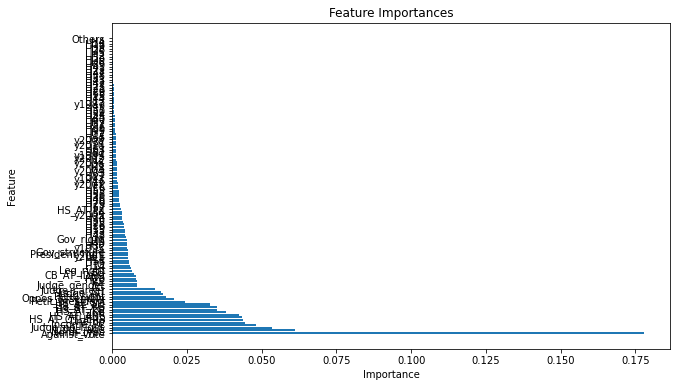

In [80]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [81]:
df_final

,Oppos_assembly,Judge_no_right,Judge_age,Infl,Unemp,Income_PC,HS_AT_AG,HS_AT_ANS,Vote,Leg_right,...,y2005,y2006,y2007,y2008,y2010,HS_AT_SD,HS_AT_TO,HS_AT_KE,HS_AT_FK,HS_AT_OTHERS
0,0.241787,0.818182,0.458333,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.241787,0.818182,0.083333,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.241787,0.818182,0.333333,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.241787,0.818182,0.500000,0.017618,0.493333,0.954455,0.9,0.333333,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.241787,0.818182,0.625000,0.017618,0.493333,0.954455,0.9,0.333333,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31551,0.484312,0.000000,0.708333,0.381453,0.120000,0.000000,0.0,0.000000,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31552,0.484312,0.000000,0.791667,0.381453,0.120000,0.000000,0.0,0.000000,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31553,0.484312,0.000000,0.791667,0.381453,0.120000,0.000000,0.0,0.000000,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0
31554,0.484312,0.000000,0.458333,0.381453,0.120000,0.000000,0.0,0.000000,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0


In [82]:
selected_vars = ['Vote', 'Gov_structure', 'Gov_right', 'Oppos_assembly', 'Leg_right', 'Petit_president', 'President_right', 'Judge_age', 'Judge_gender', 'Judge_career', 'Judge_AU', 'Infl', 'Unemp', 'Income_PC', 'AG', 'ANS', 'SD', 'TO', 'KE']

df_new = df_final[selected_vars].copy()

# Print the new dataframe
df_new


,Vote,Gov_structure,Gov_right,Oppos_assembly,Leg_right,Petit_president,President_right,Judge_age,Judge_gender,Judge_career,Judge_AU,Infl,Unemp,Income_PC,AG,ANS,SD,TO,KE
0,0.0,1.0,1.0,0.241787,1,0.0,1.0,0.458333,1.0,0.0,1.0,0.017618,0.493333,0.954455,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.241787,1,0.0,1.0,0.083333,1.0,0.0,0.0,0.017618,0.493333,0.954455,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.241787,1,0.0,1.0,0.333333,1.0,1.0,0.0,0.017618,0.493333,0.954455,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.241787,1,0.0,1.0,0.500000,1.0,0.0,1.0,0.017618,0.493333,0.954455,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.241787,1,0.0,1.0,0.625000,1.0,1.0,1.0,0.017618,0.493333,0.954455,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31551,0.0,1.0,1.0,0.484312,1,0.0,0.0,0.708333,1.0,1.0,1.0,0.381453,0.120000,0.000000,0.0,0.0,0.0,0.0,0.0
31552,0.0,1.0,1.0,0.484312,1,0.0,0.0,0.791667,1.0,1.0,1.0,0.381453,0.120000,0.000000,0.0,0.0,0.0,0.0,0.0
31553,1.0,1.0,1.0,0.484312,1,0.0,0.0,0.791667,1.0,1.0,0.0,0.381453,0.120000,0.000000,0.0,0.0,0.0,0.0,0.0
31554,0.0,1.0,1.0,0.484312,1,0.0,0.0,0.458333,1.0,1.0,1.0,0.381453,0.120000,0.000000,0.0,0.0,0.0,0.0,0.0


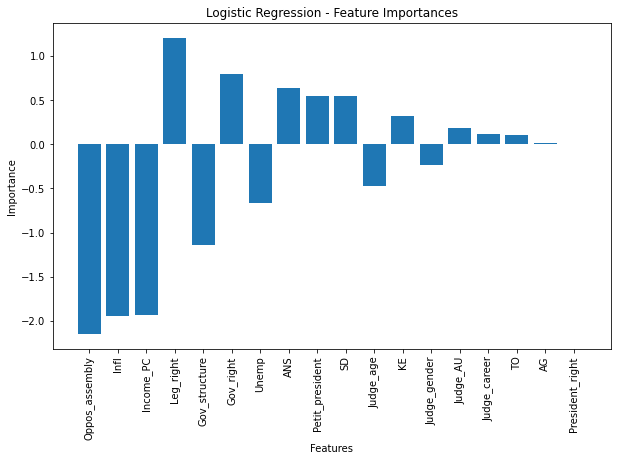

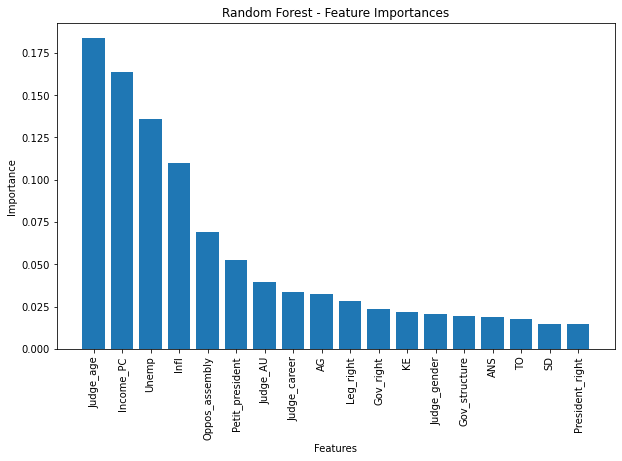

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separate the features (X) and the target variable (y)
X = df_new.drop('Vote', axis=1)
y = df_new['Vote']

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X, y)

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X, y)

# Get feature importances from Logistic Regression
logreg_importances = logreg.coef_[0]
logreg_feature_names = X.columns

# Sort feature importances in descending order
logreg_indices = np.argsort(np.abs(logreg_importances))[::-1]

# Visualize feature importances for Logistic Regression
plt.figure(figsize=(10, 6))
plt.title("Logistic Regression - Feature Importances")
plt.bar(range(len(logreg_importances)), logreg_importances[logreg_indices])
plt.xticks(range(len(logreg_importances)), logreg_feature_names[logreg_indices], rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Get feature importances from Random Forest
rfc_importances = rfc.feature_importances_
rfc_feature_names = X.columns

# Sort feature importances in descending order
rfc_indices = np.argsort(rfc_importances)[::-1]

# Visualize feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.title("Random Forest - Feature Importances")
plt.bar(range(len(rfc_importances)), rfc_importances[rfc_indices])
plt.xticks(range(len(rfc_importances)), rfc_feature_names[rfc_indices], rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [84]:
# Get the column names for the first six most important features
top_features = rfc_feature_names[rfc_indices][:6]
print(top_features)

Index(['Judge_age', 'Income_PC', 'Unemp', 'Infl', 'Oppos_assembly',
       'Petit_president'],
      dtype='object')


In [85]:
# Political, socio-demographic, and economic features with Presidential features 
Vote_whole = logit("Vote ~ Judge_age + Income_PC + Unemp + Infl + Oppos_assembly + Petit_president", df_final).fit()
print(Vote_whole.summary())
Vote_whole.pred_table()

Optimization terminated successfully.
         Current function value: 0.592620
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Vote   No. Observations:                31556
Model:                          Logit   Df Residuals:                    31549
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                 0.03713
Time:                        19:09:08   Log-Likelihood:                -18701.
converged:                       True   LL-Null:                       -19422.
Covariance Type:            nonrobust   LLR p-value:                1.862e-308
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1074      0.086     -1.247      0.213      -0.276       0.061
Judge_age     

array([[21682.,   233.],
       [ 9291.,   350.]])

In [86]:
# Political, socio-demographic, and economic features with Presidential features 
Vote_whole = logit("Vote ~ Gov_structure + Gov_right + Oppos_assembly + Leg_right + Petit_president + President_right", df_final).fit()
print(Vote_whole.summary())
Vote_whole.pred_table()

Optimization terminated successfully.
         Current function value: 0.581983
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Vote   No. Observations:                31556
Model:                          Logit   Df Residuals:                    31549
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                 0.05441
Time:                        19:09:08   Log-Likelihood:                -18365.
converged:                       True   LL-Null:                       -19422.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7530      0.051    -14.746      0.000      -0.853      -0.653
Gov_structure 

array([[20479.,  1436.],
       [ 7832.,  1809.]])

In [87]:
# Political, socio-demographic, and economic features with Presidential features 
Vote_whole = logit("Vote ~ Gov_structure + Gov_right + Oppos_assembly + Leg_right + Petit_president + President_right + Judge_age + Judge_gender + Judge_career + Judge_AU + Infl + Unemp + Income_PC + AG + ANS + SD + TO + KE", df_final).fit()
print(Vote_whole.summary())
Vote_whole.pred_table()

Optimization terminated successfully.
         Current function value: 0.569339
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Vote   No. Observations:                31556
Model:                          Logit   Df Residuals:                    31537
Method:                           MLE   Df Model:                           18
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                 0.07495
Time:                        19:09:08   Log-Likelihood:                -17966.
converged:                       True   LL-Null:                       -19422.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5401      0.143      3.766      0.000       0.259       0.821
Gov_structure 

array([[20190.,  1725.],
       [ 7326.,  2315.]])

# Strategy 3: Use all the covariates in prediction and pick the most important features for econometric analysis

In [88]:
df_new

,Vote,Gov_structure,Gov_right,Oppos_assembly,Leg_right,Petit_president,President_right,Judge_age,Judge_gender,Judge_career,Judge_AU,Infl,Unemp,Income_PC,AG,ANS,SD,TO,KE
0,0.0,1.0,1.0,0.241787,1,0.0,1.0,0.458333,1.0,0.0,1.0,0.017618,0.493333,0.954455,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.241787,1,0.0,1.0,0.083333,1.0,0.0,0.0,0.017618,0.493333,0.954455,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.241787,1,0.0,1.0,0.333333,1.0,1.0,0.0,0.017618,0.493333,0.954455,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.241787,1,0.0,1.0,0.500000,1.0,0.0,1.0,0.017618,0.493333,0.954455,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.241787,1,0.0,1.0,0.625000,1.0,1.0,1.0,0.017618,0.493333,0.954455,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31551,0.0,1.0,1.0,0.484312,1,0.0,0.0,0.708333,1.0,1.0,1.0,0.381453,0.120000,0.000000,0.0,0.0,0.0,0.0,0.0
31552,0.0,1.0,1.0,0.484312,1,0.0,0.0,0.791667,1.0,1.0,1.0,0.381453,0.120000,0.000000,0.0,0.0,0.0,0.0,0.0
31553,1.0,1.0,1.0,0.484312,1,0.0,0.0,0.791667,1.0,1.0,0.0,0.381453,0.120000,0.000000,0.0,0.0,0.0,0.0,0.0
31554,0.0,1.0,1.0,0.484312,1,0.0,0.0,0.458333,1.0,1.0,1.0,0.381453,0.120000,0.000000,0.0,0.0,0.0,0.0,0.0


In [89]:
X = df_new.drop(['Vote'], axis=1)
y = df_new['Vote']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X, y)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X, y)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X, y)

# SVM
svm = SVC(probability=True)
svm.fit(X, y)

SVC(probability=True)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test data
logreg_pred = logreg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svm_pred = svm.predict(X_test)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Calculate precision
logreg_precision = precision_score(y_test, logreg_pred)
dt_precision = precision_score(y_test, dt_pred)
rf_precision = precision_score(y_test, rf_pred)
xgb_precision = precision_score(y_test, xgb_pred)
svm_precision = precision_score(y_test, svm_pred)

# Calculate recall
logreg_recall = recall_score(y_test, logreg_pred)
dt_recall = recall_score(y_test, dt_pred)
rf_recall = recall_score(y_test, rf_pred)
xgb_recall = recall_score(y_test, xgb_pred)
svm_recall = recall_score(y_test, svm_pred)

# Calculate F1-score
logreg_f1 = f1_score(y_test, logreg_pred)
dt_f1 = f1_score(y_test, dt_pred)
rf_f1 = f1_score(y_test, rf_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
svm_f1 = f1_score(y_test, svm_pred)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM'],
                           'Accuracy': [logreg_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy],
                           'Precision': [logreg_precision, dt_precision, rf_precision, xgb_precision, svm_precision],
                           'Recall': [logreg_recall, dt_recall, rf_recall, xgb_recall, svm_recall],
                           'F1-score': [logreg_f1, dt_f1, rf_f1, xgb_f1, svm_f1]})

# Print the results
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.711343   0.576588  0.238046  0.336972
1        Decision Tree  0.750158   0.661687  0.387147  0.488485
2        Random Forest  0.749842   0.654822  0.397943  0.495043
3              XGBoost  0.750634   0.657070  0.398972  0.496481
4                  SVM  0.725602   0.626937  0.270437  0.377874


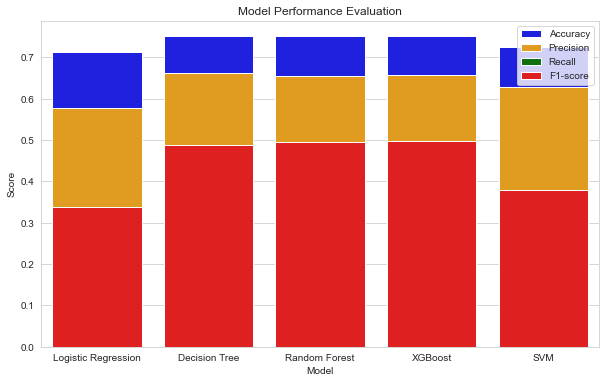

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot of the evaluation metrics
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', color='blue', label='Accuracy')
sns.barplot(data=results_df, x='Model', y='Precision', color='orange', label='Precision')
sns.barplot(data=results_df, x='Model', y='Recall', color='green', label='Recall')
sns.barplot(data=results_df, x='Model', y='F1-score', color='red', label='F1-score')

# Set the labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Evaluation')

# Add a legend
plt.legend()

# Show the plot
plt.show()


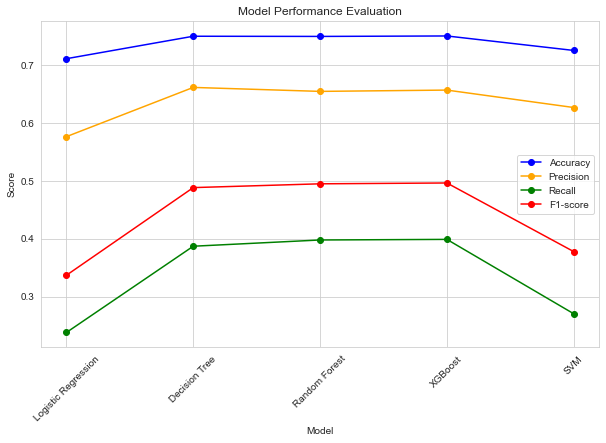

In [93]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the metrics and their corresponding colors
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
colors = ['blue', 'orange', 'green', 'red']

# Plot the line chart for each metric
for i in range(len(metrics)):
    plt.plot(results_df['Model'], results_df[metrics[i]], color=colors[i], marker='o', label=metrics[i])

# Set the labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Evaluation')

# Add a legend
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()


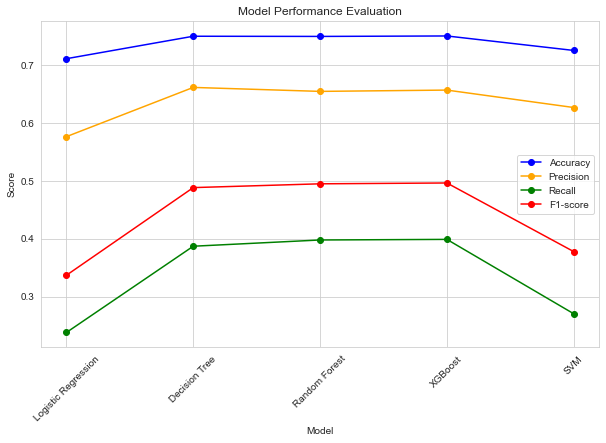

In [94]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the metrics and their corresponding colors
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
colors = ['blue', 'orange', 'green', 'red']

# Plot the line chart for each metric
for i in range(len(metrics)):
    plt.plot(results_df['Model'], results_df[metrics[i]], marker='o', color=colors[i], label=metrics[i])

# Set the labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Evaluation')

# Add a legend
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()


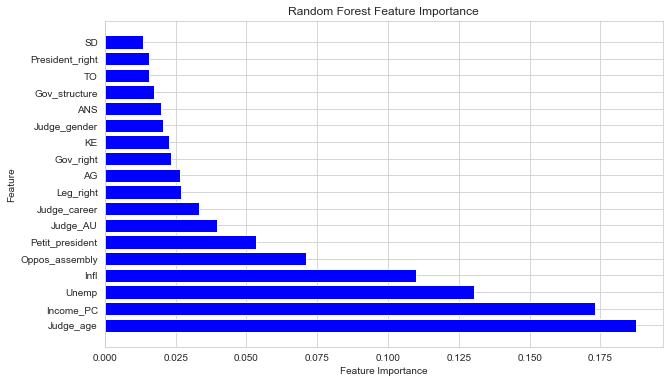

            Feature  Importance
6         Judge_age    0.187658
12        Income_PC    0.173232
11            Unemp    0.130371
10             Infl    0.109760
2    Oppos_assembly    0.071164
4   Petit_president    0.053400
9          Judge_AU    0.039457
8      Judge_career    0.033117
3         Leg_right    0.027058
13               AG    0.026460
1         Gov_right    0.023343
17               KE    0.022530
7      Judge_gender    0.020583
14              ANS    0.019787
0     Gov_structure    0.017302
16               TO    0.015761
5   President_right    0.015637
15               SD    0.013380


In [95]:
# Get feature importances
importances_rf = rf.feature_importances_

# Create a DataFrame with feature importances
feature_importances_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf})

# Sort the feature importances in descending order
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_rf['Feature'], feature_importances_rf['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Print the feature importances
print(feature_importances_rf)


In [96]:
# Set the threshold for feature importance
threshold = 0.025

# Filter the feature importances based on the threshold
selected_features_rf = feature_importances_rf[feature_importances_rf['Importance'] >= threshold]['Feature']

# Print the selected features
print(selected_features_rf)


6           Judge_age
12          Income_PC
11              Unemp
10               Infl
2      Oppos_assembly
4     Petit_president
9            Judge_AU
8        Judge_career
3           Leg_right
13                 AG
Name: Feature, dtype: object


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import classification_report

# Create a new DataFrame with the selected features
df_selected = df_final[selected_features_rf.tolist() + ['Vote']]

# Split the data into X and y
X = df_selected.drop('Vote', axis=1)
y = df_selected['Vote']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classification models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM']
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    xgb.XGBClassifier(),
    svm.SVC()
]

# Train and evaluate the models
results = []
for model, classifier in zip(models, classifiers):
    # Fit the model to the training data
    classifier.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model performance
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': model,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.695025   0.650865  0.695025  0.621215
1        Decision Tree  0.737167   0.719769  0.737167  0.713220
2        Random Forest  0.737484   0.720188  0.737484  0.714556
3              XGBoost  0.736375   0.718902  0.736375  0.714842
4                  SVM  0.712611   0.686572  0.712611  0.661199


# Result
When the accuracy score decreases but the F1-score increases, it suggests that the model is performing better in terms of capturing the trade-off between precision and recall.

Accuracy is a measure of the overall correctness of the model's predictions, indicating the percentage of correct predictions out of the total number of predictions. It considers both true positives and true negatives. However, accuracy alone may not be the most informative metric, especially when dealing with imbalanced datasets or when the cost of false positives and false negatives differs.

F1-score, on the other hand, is a harmonic mean of precision and recall. Precision measures the proportion of true positives out of the total predicted positives, while recall measures the proportion of true positives out of the total actual positives. F1-score combines these two metrics and provides a single value that balances both precision and recall. It is particularly useful when the dataset is imbalanced or when both false positives and false negatives are costly.

If the accuracy score decreases while the F1-score increases, it suggests that the model is achieving better balance between precision and recall, even though the overall correctness of the predictions has decreased slightly. This can happen when the model becomes better at identifying positive instances (higher recall) while still maintaining a reasonable level of precision. It indicates that the model is performing well in capturing the positive class, which is often of greater interest in many classification tasks.

In summary, a decrease in accuracy with an increase in the F1-score suggests that the model is providing a better trade-off between precision and recall, focusing on correctly identifying positive instances while minimizing false positives and false negatives.

In [98]:
df_selected

,Judge_age,Income_PC,Unemp,Infl,Oppos_assembly,Petit_president,Judge_AU,Judge_career,Leg_right,AG,Vote
0,0.458333,0.954455,0.493333,0.017618,0.241787,0.0,1.0,0.0,1,0.0,0.0
1,0.083333,0.954455,0.493333,0.017618,0.241787,0.0,0.0,0.0,1,1.0,0.0
2,0.333333,0.954455,0.493333,0.017618,0.241787,0.0,0.0,1.0,1,0.0,0.0
3,0.500000,0.954455,0.493333,0.017618,0.241787,0.0,1.0,0.0,1,0.0,1.0
4,0.625000,0.954455,0.493333,0.017618,0.241787,0.0,1.0,1.0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31551,0.708333,0.000000,0.120000,0.381453,0.484312,0.0,1.0,1.0,1,0.0,0.0
31552,0.791667,0.000000,0.120000,0.381453,0.484312,0.0,1.0,1.0,1,0.0,0.0
31553,0.791667,0.000000,0.120000,0.381453,0.484312,0.0,0.0,1.0,1,0.0,1.0
31554,0.458333,0.000000,0.120000,0.381453,0.484312,0.0,1.0,1.0,1,0.0,0.0


In [99]:
df_selected.columns

Index(['Judge_age', 'Income_PC', 'Unemp', 'Infl', 'Oppos_assembly',
       'Petit_president', 'Judge_AU', 'Judge_career', 'Leg_right', 'AG',
       'Vote'],
      dtype='object')

In [102]:
# Political, socio-demographic, and economic features with Presidential features 
Vote_selected = logit("Vote ~ Judge_age + Income_PC + Unemp + Infl + Oppos_assembly + Petit_president + Judge_AU + AG + Judge_career + Leg_right", df_selected).fit()
print(Vote_selected.summary())
Vote_selected.pred_table()

Optimization terminated successfully.
         Current function value: 0.581090
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Vote   No. Observations:                31556
Model:                          Logit   Df Residuals:                    31545
Method:                           MLE   Df Model:                           10
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                 0.05586
Time:                        19:31:09   Log-Likelihood:                -18337.
converged:                       True   LL-Null:                       -19422.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5989      0.091     -6.581      0.000      -0.777      -0.421
Judge_age     

array([[20740.,  1175.],
       [ 8486.,  1155.]])

In [103]:
# Political, socio-demographic, and economic features with Presidential features 
Vote_whole = logit("Vote ~ Gov_structure + Gov_right + Oppos_assembly + Leg_right + Petit_president + President_right + Judge_age + Judge_gender + Judge_career + Judge_AU + Infl + Unemp + Income_PC + AG + ANS + SD + TO + KE", df_final).fit()
print(Vote_whole.summary())
Vote_whole.pred_table()

Optimization terminated successfully.
         Current function value: 0.569339
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Vote   No. Observations:                31556
Model:                          Logit   Df Residuals:                    31537
Method:                           MLE   Df Model:                           18
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                 0.07495
Time:                        19:31:24   Log-Likelihood:                -17966.
converged:                       True   LL-Null:                       -19422.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5401      0.143      3.766      0.000       0.259       0.821
Gov_structure 

array([[20190.,  1725.],
       [ 7326.,  2315.]])

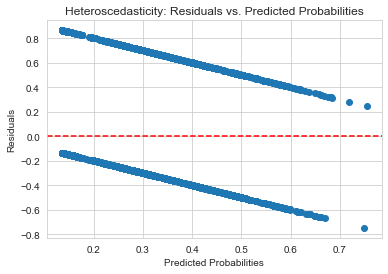

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df_selected' containing the selected features and the target variable 'Vote'
# Split the data into features (X) and target (y)
X = df_selected.drop('Vote', axis=1)
y = df_selected['Vote']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get the predicted probabilities from the logistic regression model
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Assuming you want the probabilities of the positive class

# Calculate the residuals
residuals = y_test - y_pred_prob

# Plot the residuals against the predicted probabilities
plt.scatter(y_pred_prob, residuals)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals')
plt.title('Heteroscedasticity: Residuals vs. Predicted Probabilities')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()


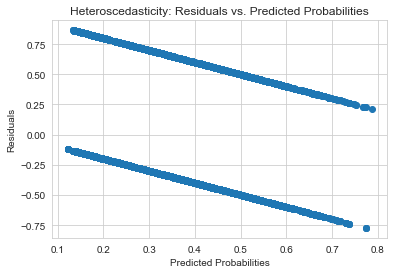

In [105]:
# Get the predicted probabilities from the logistic regression model
y_pred_prob = Vote_whole.predict()

# Calculate the residuals
residuals = Vote_whole.model.endog - y_pred_prob

# Plot the residuals against the predicted values
plt.scatter(y_pred_prob, residuals)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals')
plt.title('Heteroscedasticity: Residuals vs. Predicted Probabilities')
plt.show()

# Predicting probabilities

In [106]:
import xgboost as xgb
from sklearn.svm import SVC

# Define the models
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb.XGBClassifier(),
    'SVM': SVC(probability=True)  # Use the SVC model with probability=True to get predicted probabilities
}

# Create an empty dictionary to store the predicted probabilities
proba_dict = {}

# Loop through the models
for model_name, model in models.items():
    if model_name == 'XGBoost':
        # Train the XGBoost model
        model.fit(X_train, y_train)
    else:
        # Fit the model to your data
        model.fit(X_train, y_train)
    
    # Predict the probabilities for each class
    proba = model.predict_proba(X_test)
    
    # Access the predicted probabilities for the positive class
    positive_proba = proba[:, 1]
    
    # Store the predicted probabilities in the dictionary
    proba_dict[model_name] = positive_proba

# Print the predicted probabilities for each model
for model_name, proba in proba_dict.items():
    print(f"{model_name}:\n{proba}\n")


Logistic Regression:
[0.15160556 0.13816131 0.36130665 ... 0.38324747 0.15160556 0.19291071]

Decision Tree:
[0.09375    0.16600791 0.30555556 ... 0.25609756 0.09375    0.1563981 ]

Random Forest:
[0.09682814 0.16438048 0.30683161 ... 0.25627672 0.09682814 0.15616164]

XGBoost:
[0.09483454 0.16511136 0.31991124 ... 0.25360426 0.09483454 0.16025212]

SVM:
[0.25446094 0.25445446 0.25445186 ... 0.25444074 0.25446094 0.25437856]



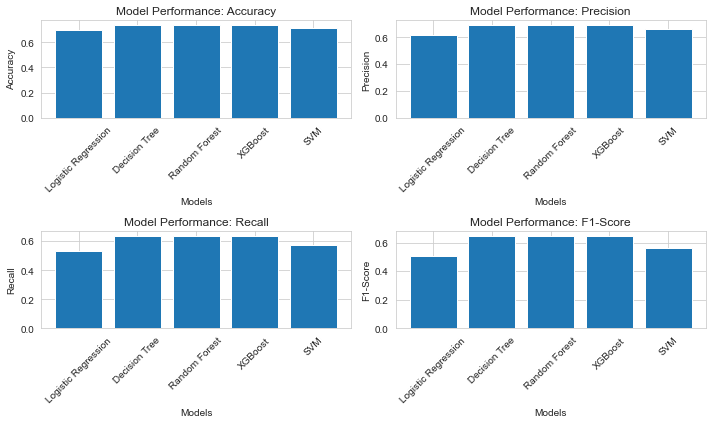

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Create lists to store the model names and performance metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate the performance metrics for each model
for model_name, proba in proba_dict.items():
    # Convert predicted probabilities to binary predictions
    y_pred = (proba >= 0.5).astype(int)
    
    # Calculate the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract the performance metrics
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    # Add the performance metrics to the lists
    model_names.append(model_name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score)

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the bar positions
bar_positions = range(len(model_names))

# Plot the bar chart for accuracy
plt.subplot(2, 2, 1)
plt.bar(bar_positions, accuracy_scores)
plt.xticks(bar_positions, model_names, rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance: Accuracy')

# Plot the bar chart for precision
plt.subplot(2, 2, 2)
plt.bar(bar_positions, precision_scores)
plt.xticks(bar_positions, model_names, rotation=45)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Model Performance: Precision')

# Plot the bar chart for recall
plt.subplot(2, 2, 3)
plt.bar(bar_positions, recall_scores)
plt.xticks(bar_positions, model_names, rotation=45)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Model Performance: Recall')

# Plot the bar chart for F1-score
plt.subplot(2, 2, 4)
plt.bar(bar_positions, f1_scores)
plt.xticks(bar_positions, model_names, rotation=45)
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Model Performance: F1-Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


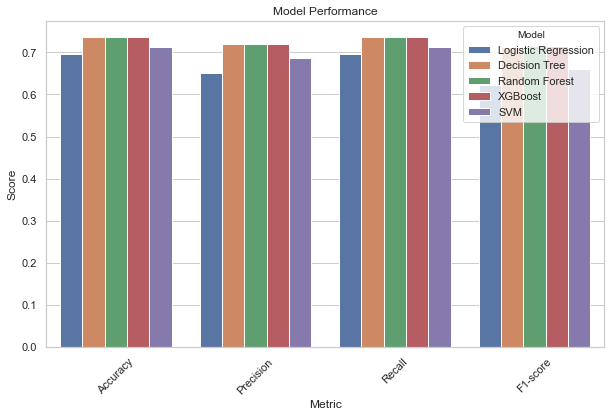

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Define the model names and corresponding performance metrics
model_names = list(results_df['Model'])
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create a dataframe with the performance metrics
data = results_df[metrics].transpose()

# Reset the index and rename the columns
data = data.reset_index()
data.columns = ['Metric'] + model_names

# Melt the dataframe to long format
data_melted = data.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=data_melted)

# Set the title and labels
plt.title('Model Performance')
plt.xlabel('Metric')
plt.ylabel('Score')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


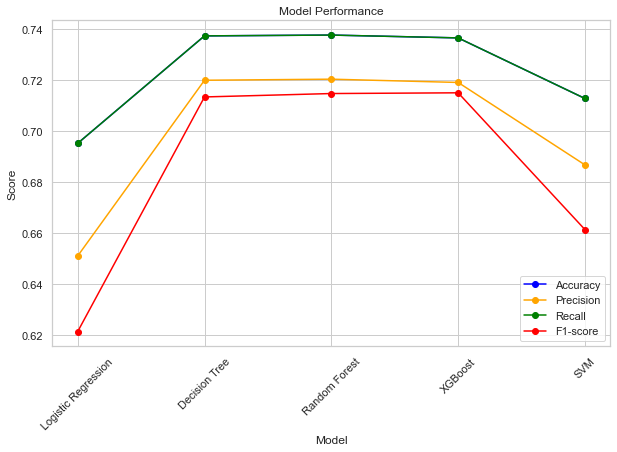

In [109]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the metrics and their corresponding colors
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
colors = ['blue', 'orange', 'green', 'red']

# Plot the line graph for each metric
for i in range(len(metrics)):
    plt.plot(results_df['Model'], results_df[metrics[i]], marker='o', color=colors[i], label=metrics[i])

# Set the labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance')

# Add a legend
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the graph
plt.show()


In [110]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of Random Forest classifier
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X_train, y_train)

# Get feature importances
importances_rf = rf.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances_rf):
    print(f"{feature}: {importance}")


Judge_age: 0.29129083882162143
Income_PC: 0.19180280398417754
Unemp: 0.14024556260405593
Infl: 0.12165255869330624
Oppos_assembly: 0.0621384068355641
Petit_president: 0.04900587670555376
Judge_AU: 0.041630503757846604
Judge_career: 0.03595456162786945
Leg_right: 0.031742338852717183
AG: 0.03453654811728777


In [111]:
import xgboost as xgb

# Create an instance of XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model to the data
xgb_model.fit(X_train, y_train)

# Get feature importances
importances_xgb = xgb_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances_xgb):
    print(f"{feature}: {importance}")


Judge_age: 0.0491887703537941
Income_PC: 0.15235894918441772
Unemp: 0.15038597583770752
Infl: 0.08045516908168793
Oppos_assembly: 0.05395616590976715
Petit_president: 0.06777887046337128
Judge_AU: 0.03425096347928047
Judge_career: 0.04188026487827301
Leg_right: 0.19243034720420837
AG: 0.17731454968452454


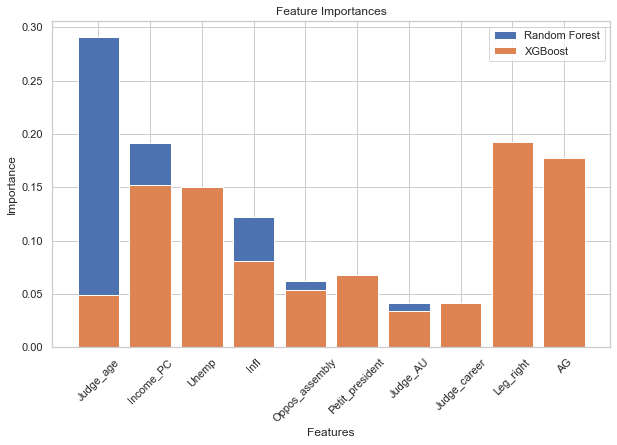

In [112]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Random Forest feature importances
ax.bar(X.columns, importances_rf, label='Random Forest')

# Plot XGBoost feature importances
ax.bar(X.columns, importances_xgb, label='XGBoost')

# Set axis labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Show the plot
plt.show()


In [113]:
# ensemble 
# Create an empty array to store the predicted probabilities
proba_ensemble = np.zeros_like(proba_dict['Logistic Regression'])

# Loop through the models and sum the predicted probabilities
for model_name, proba in proba_dict.items():
    proba_ensemble += proba

# Average the predicted probabilities
proba_ensemble /= len(proba_dict)

# Print the predicted probabilities from the ensemble model
print("Ensemble Predicted Probabilities:\n", proba_ensemble)


Ensemble Predicted Probabilities:
 [0.13829583 0.1776231  0.30961138 ... 0.28073335 0.13829583 0.18402023]


In this context, "samples" refers to the individual data points or instances in your test dataset for which you are predicting the probabilities. Each point on the x-axis represents a sample, and the corresponding y-axis value represents the predicted probability for that sample. The line plot shows the variation of predicted probabilities across different models for each sample in your test dataset.

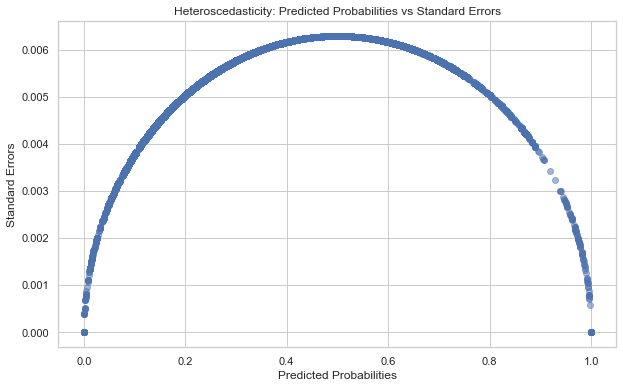

In [114]:
import matplotlib.pyplot as plt

# Create lists to store the predicted probabilities and standard errors
proba_values = []
std_errors = []

# Loop through the models and their predicted probabilities
for proba in proba_dict.values():
    proba_values.extend(proba)
    std_errors.extend(np.sqrt(proba * (1 - proba) / len(y_test)))  # Calculate standard errors

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot of predicted probabilities and standard errors
plt.scatter(proba_values, std_errors, alpha=0.5)

# Set the x-axis label
plt.xlabel('Predicted Probabilities')

# Set the y-axis label
plt.ylabel('Standard Errors')

# Set the title
plt.title('Heteroscedasticity: Predicted Probabilities vs Standard Errors')

# Show the plot
plt.show()


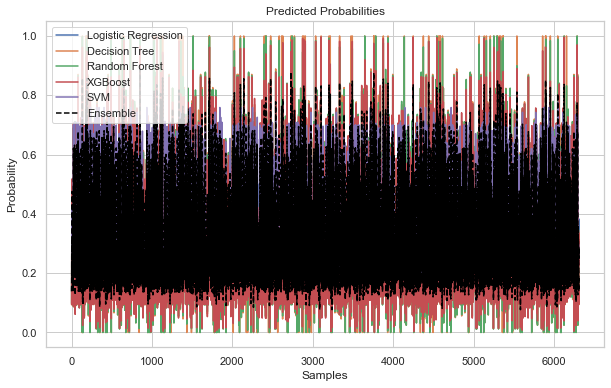

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb.XGBClassifier(),
    'SVM': SVC(probability=True)
}

# Create an empty dictionary to store the predicted probabilities
proba_dict = {}

# Loop through the models
for model_name, model in models.items():
    if model_name == 'XGBoost':
        # Train the XGBoost model
        model.fit(X_train, y_train)
    else:
        # Fit the model to your data
        model.fit(X_train, y_train)
    
    # Predict the probabilities for each class
    proba = model.predict_proba(X_test)
    
    # Access the predicted probabilities for the positive class
    positive_proba = proba[:, 1]
    
    # Store the predicted probabilities in the dictionary
    proba_dict[model_name] = positive_proba

# Perform ensemble using the predicted probabilities
proba_ensemble = np.zeros_like(proba_dict['Logistic Regression'])
for proba in proba_dict.values():
    proba_ensemble += proba
proba_ensemble /= len(proba_dict)

# Create lists to store the model names and predicted probabilities
model_names = []
proba_values = []

# Loop through the models and their predicted probabilities
for model_name, proba in proba_dict.items():
    model_names.append(model_name)
    proba_values.append(proba)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the line chart for each model
for model_name, proba in zip(model_names, proba_values):
    plt.plot(proba, label=model_name)

# Plot the ensemble predicted probabilities
plt.plot(proba_ensemble, label='Ensemble', color='black', linestyle='dashed')

# Set the x-axis label
plt.xlabel('Samples')

# Set the y-axis label
plt.ylabel('Probability')

# Set the title
plt.title('Predicted Probabilities')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [118]:
from sklearn.metrics import classification_report
import pandas as pd
 
# Define the models
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb.XGBClassifier(),
    'SVM': SVC(probability=True)
}

# Create an empty dictionary to store the predicted probabilities
proba_dict = {}

# Loop through the models
for model_name, model in models.items():
    if model_name == 'XGBoost':
        # Train the XGBoost model
        model.fit(X_train, y_train)
    else:
        # Fit the model to your data
        model.fit(X_train, y_train)
    
    # Predict the probabilities for each class
    proba = model.predict_proba(X_test)
    
    # Access the predicted probabilities for the positive class
    positive_proba = proba[:, 1]
    
    # Store the predicted probabilities in the dictionary
    proba_dict[model_name] = positive_proba

# Perform ensemble using the predicted probabilities
proba_ensemble = sum(proba_dict.values()) / len(proba_dict)
proba_dict['Ensemble'] = proba_ensemble

# Create an empty DataFrame to store the model performance results
performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Calculate the model performance metrics for each model
for model_name, proba in proba_dict.items():
    # Convert predicted probabilities to binary predictions
    y_pred = (proba >= 0.5).astype(int)
    
    # Calculate the model performance metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract the performance metrics
    accuracy = report['accuracy']
    if '1' in report:  # Check if positive class label '1' is present in the report
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1_score = report['1']['f1-score']
    else:
        precision = 0.0  # Set to a default value if '1' is not present
        recall = 0.0
        f1_score = 0.0
    
    # Add the model performance results to the DataFrame
    performance_df = performance_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }, ignore_index=True)

# Print the model performance results
print(performance_df)


                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression  0.695025        0.0     0.0       0.0
1        Decision Tree  0.736850        0.0     0.0       0.0
2        Random Forest  0.736850        0.0     0.0       0.0
3              XGBoost  0.736375        0.0     0.0       0.0
4                  SVM  0.712452        0.0     0.0       0.0
5             Ensemble  0.731464        0.0     0.0       0.0
